In [1]:
# Import the Libraries
import re
import requests
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd

In [2]:
# Import the Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from scipy.special import inv_boxcox
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import scipy as sci
import scipy.stats as stats
from seaborn_qqplot import pplot
import sidetable

sns.set_style('whitegrid')
plt.style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# for HD visualizations
%config InlinrBackend.figure_format ='retina'

C:\Users\psath\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
# request 

page = requests.get('https://www.makaan.com/hyderabad-residential-property/buy-property-in-hyderabad-city?_=1696042928916&page=1')

In [4]:
page

<Response [200]>

In [5]:
soup = BeautifulSoup(page.text)

In [6]:
# Extracting all Data from Makaan webside
# this Extracting only first page

seller = []
sellertype =[]
BHKs = []
location = []
City = []
Price = []
Price_per_sqft = []
Area_sqft = []
Cons_status = []

# 1. Seller Name
seller_name = soup.find_all('a',class_='seller-name')
for i in seller_name:
    a = i.text
    seller.append(a)
    
# 2. Seller type
seller_type = soup.find_all('div',class_='second-line')
for i in seller_type:
    a = i.text
    sellertype.append(a)
    
# 3. BHK
BHK = soup.find_all('a',class_='typelink')
for i in BHK:
    a = i.text
    BHKs.append(a)
    
# 4. Location
loc = soup.find_all("a",class_="loclink")
for i in loc:
    a = i.text
    location.append(a)
    
# 5. City
city = soup.find_all("span",class_="cityName")
for i in city:
    a = i.text
    City.append(a)

# 6. Total Price
total_price = soup.find_all("td",class_="price")
for i in total_price:
    a = i.text
    Price.append(a)

# 7. price per sqft
price_per_sqft = soup.find_all("td",class_="lbl rate")
for i in price_per_sqft:
    a = i.text
    b = a.replace('/ sq ft','')
    Price_per_sqft.append(b)
    
# 8. Area in Sqft
Area_in_sqft = soup.find_all('td',class_='size')
for i in Area_in_sqft:
    a = i.text
    Area_sqft.append(a)
    
# 9. Construction status
cons_stus = soup.find_all('td',class_='val')
for i in cons_stus :
    a = i.text
    Cons_status.append(a)
    


In [7]:
# for checking length of columns

print(len(seller))
print(len(sellertype))
print(len(BHKs))
print(len(location))
print(len(City))
print(len(Price))
print(len(Price_per_sqft))
print(len(Area_sqft))
print(len(Cons_status))

20
20
20
20
20
20
20
20
20


In [8]:
# Create a DataFrame

Dictionary = {
    
    'Seller Name' : seller,
    'Seller type' : sellertype,
    'BHK' : BHKs,
    'Location' : location,
    'City' : City,
    'Price' : Price,
    'Price_per_sqft' : Price_per_sqft,
    'Area_sqft' : Area_sqft,
    'Construction status' : Cons_status
}

In [9]:
df1 = pd.DataFrame(Dictionary)
df1

Seller Name Seller type                      BHK  \
0                  Abode Developers     BUILDER          2 BHK Apartment   
1                  Elemental Realty     BUILDER              4 BHK Villa   
2       R V Nirmaan Private Limited     BUILDER          3 BHK Apartment   
3                      Vasavi Group     BUILDER          2 BHK Apartment   
4           Shree Vasavi Developers     BUILDER          3 BHK Apartment   
5                  Risinia Builders     BUILDER          2 BHK Apartment   
6                 Cyber City Oriana     BUILDER          3 BHK Apartment   
7                       Ira Reality     BUILDER              4 BHK Villa   
8             Kalyan Infra Projects     BUILDER          3 BHK Apartment   
9                Jain Constructions     BUILDER          3 BHK Apartment   
10                Hallmark Builders     BUILDER          3 BHK Apartment   
11                        APR Group     BUILDER              4 BHK Villa   
12                  Grenstone Infra     BUILDER              4 BHK Villa   
13                   Mahaveer Group     BUILDER          4 BHK Apartment   
14                    Beyond Nature     BUILDER         Residential Plot   
15                Salarpuria Sattva     BUILDER          3 BHK Apartment   
16                SVC Constructions     BUILDER          3 BHK Apartment   
17  Om Sree Builders And Developers     BUILDER          3 BHK Apartment   
18        Provident Housing Limited     BUILDER          3 BHK Apartment   
19                        GSR Group     BUILDER  4 BHK Independent House   

                                Location       City     Price Price_per_sqft  \
0                    Ameenpur, Hyderabad  Hyderabad   62.91 L         5,400    
1                  Patancheru, Hyderabad  Hyderabad   1.48 Cr         7,700    
2                     Miyapur, Hyderabad  Hyderabad   1.27 Cr         6,500    
3                 Uppal Kalan, Hyderabad  Hyderabad   64.95 L         6,104    
4                     Attapur, Hyderabad  Hyderabad   1.46 Cr         7,299    
5   Pragathi Nagar Kukatpally, Hyderabad  Hyderabad   73.45 L         5,599    
6                  Kukatpally, Hyderabad  Hyderabad   1.28 Cr         8,699    
7                    Adibatla, Hyderabad  Hyderabad   3.14 Cr         8,500    
8                Manchirevula, Hyderabad  Hyderabad   1.42 Cr         6,625    
9                  Malkajgiri, Hyderabad  Hyderabad   1.63 Cr         7,300    
10                Patighanpur, Hyderabad  Hyderabad   1.13 Cr         6,002    
11                 Bachupally, Hyderabad  Hyderabad   4.08 Cr        12,000    
12                Maheshwaram, Hyderabad  Hyderabad    1.4 Cr         5,200    
13                    Attapur, Hyderabad  Hyderabad   3.52 Cr         7,500    
14                Sadashivpet, Hyderabad  Hyderabad      63 L         2,000    
15                    Kokapet, Hyderabad  Hyderabad    2.8 Cr        10,239    
16                 Jeedimetla, Hyderabad  Hyderabad   1.02 Cr         5,400    
17                 Sainikpuri, Hyderabad  Hyderabad   1.38 Cr         6,300    
18             Rajendra Nagar, Hyderabad  Hyderabad      80 L         7,641    
19                     Kollur, Hyderabad  Hyderabad   4.09 Cr         6,500    

   Area_sqft Construction status  
0      1165   Under Construction  
1      1930   Under Construction  
2      1967   Under Construction  
3      1065   Under Construction  
4      2005   Under Construction  
5      1312   Under Construction  
6      1480   Under Construction  
7      3705   Under Construction  
8      2150   Under Construction  
9      2245   Under Construction  
10     1885   Under Construction  
11     3400   Under Construction  
12     2701   Under Construction  
13     4706   Under Construction  
14     3150                  New  
15     2744   Under Construction  
16     1902   Under Construction  
17     2200        Ready to move  
18     1047        Ready to move  
19     6300   Under Construction

In [10]:
# Extracting all Data from Makaan webside
# this Extracting 5 pages

seller = []
sellertype =[]
BHKs = []
location = []
City = []
Price = []
Price_per_sqft = []
Area_sqft = []
Cons_status = []

for i in range(1,2):
    urls = 'https://www.makaan.com/gwalior-residential-property/buy-property-in-gwalior-city?_=1696042928916&page=1y?_=1669628700661&page=' +str(i)
    print(urls)
    page = requests.get(urls)
    soup = BeautifulSoup(page.text)

    # 1. Seller Name
    seller_name = soup.find_all('a',class_='seller-name')
    for i in seller_name:
        a = i.text
        seller.append(a)
        
    # 2. Seller type
    seller_type = soup.find_all('div',class_='second-line')
    for i in seller_type:
        a = i.text
        sellertype.append(a)
        
    # 3. BHK
    BHK = soup.find_all('a',class_='typelink')
    for i in BHK:
        a = i.text
        BHKs.append(a)
    
    # 4. Location
    loc = soup.find_all("a",class_="loclink")
    for i in loc:
        a = i.text
        b=  a.split(',')[0]
        location.append(b)
        
    # 5. City
    city = soup.find_all("span",class_="cityName")
    for i in city:
        a = i.text
        City.append(a)
    
    # 6. Total Price
    total_price = soup.find_all("td",class_="price")
    for i in total_price:
        a = i.text
        Price.append(a)
    
    # 7. price per sqft
    price_per_sqft = soup.find_all("td",class_="lbl rate")
    for i in price_per_sqft:
        a = i.text
        b = a.replace('/ sq ft','')
        Price_per_sqft.append(b)
    
    # 8. Area in Sqft
    Area_in_sqft = soup.find_all('td',class_='size')
    for i in Area_in_sqft:
        a = i.text
        Area_sqft.append(a)
        
    # 9. Construction status
    cons_stus = soup.find_all('td',class_='val')
    for i in cons_stus :
        a = i.text
        Cons_status.append(a)
    



https://www.makaan.com/gwalior-residential-property/buy-property-in-gwalior-city?_=1696042928916&page=1y?_=1669628700661&page=1


In [11]:
# for checking length of columns

print(len(seller))
print(len(sellertype))
print(len(BHKs))
print(len(location))
print(len(City))
print(len(Price))
print(len(Price_per_sqft))
print(len(Area_sqft))
print(len(Cons_status))

20
20
20
20
20
20
20
20
20


In [12]:
# Create a DataFrame

Dictionary = {
    
    'Seller Name' : seller,
    'Seller type' : sellertype,
    'BHK' : BHKs,
    'Location' : location,
    'City' : City,
    'Price' : Price,
    'Price_per_sqft' : Price_per_sqft,
    'Area_sqft' : Area_sqft,
    'Construction status' : Cons_status
}

In [13]:
df_Gwalior = pd.DataFrame(Dictionary)
df_Gwalior

Seller Name     Seller type                      BHK  \
0                   seller  VERIFIED OWNER  2 BHK Independent Floor   
1                   seller  VERIFIED OWNER    1 RK Studio Apartment   
2                   seller  VERIFIED OWNER         Residential Plot   
3          Satyam builders         BUILDER         Residential Plot   
4           aamra infratec         BUILDER         Residential Plot   
5          Satyam builders         BUILDER         Residential Plot   
6           Sanjay agarwal           OWNER  2 BHK Independent House   
7             A S SIKARWAR           OWNER          3 BHK Apartment   
8                  Praveen           OWNER         Residential Plot   
9   Dheerendra Chandraketu           OWNER  3 BHK Independent House   
10          Saurabh sharma           OWNER         Residential Plot   
11           Sudeep sengar           OWNER         Residential Plot   
12        abhilasha tiwari         BUILDER          2 BHK Apartment   
13             Cosmo group         BUILDER          3 BHK Apartment   
14         Satyam builders         BUILDER         Residential Plot   
15         Harshit kushwah           OWNER         Residential Plot   
16                    Sonu           OWNER         Residential Plot   
17                  Deepak           OWNER  3 BHK Independent House   
18           east meridian           AGENT          3 BHK Apartment   
19       sanket chaturvedi         BUILDER          2 BHK Apartment   

          Location     City    Price Price_per_sqft Area_sqft  \
0     Aditya Puram  Gwalior     31 L         2,924      1060    
1          Lashkar  Gwalior   2.5 Cr        16,666      1500    
2            Morar  Gwalior     10 L         1,000      1000    
3        Dongarpur  Gwalior   43.5 L         4,350      1000    
4      Morar Cantt  Gwalior   13.2 L         1,100      1200    
5        Dongarpur  Gwalior     34 L         4,250       800    
6      Madhav Ganj  Gwalior     24 L         3,750       640    
7      Patel Nagar  Gwalior     35 L         2,916      1200    
8            Morar  Gwalior     30 L         2,400      1250    
9   Shatabdi Puram  Gwalior     60 L         2,816      2130    
10        DD Nagar  Gwalior     40 L         4,000      1000    
11           Sirol  Gwalior     62 L         5,102      1215    
12       Shekhpura  Gwalior     35 L         3,375      1037    
13           Sirol  Gwalior     41 L         2,538      1615    
14       Dongarpur  Gwalior     40 L         4,444       900    
15        Badagaon  Gwalior     11 L         1,100      1000    
16        Badagaon  Gwalior     55 L         2,619      2100    
17       Dongarpur  Gwalior     60 L         5,000      1200    
18       Mahalgaon  Gwalior     37 L         2,681      1380    
19       Mahalgaon  Gwalior     30 L         2,608      1150    

   Construction status  
0   Under Construction  
1        Ready to move  
2               Resale  
3                  New  
4                  New  
5                  New  
6        Ready to move  
7        Ready to move  
8                  New  
9        Ready to move  
10              Resale  
11              Resale  
12       Ready to move  
13  Under Construction  
14                 New  
15                 New  
16                 New  
17       Ready to move  
18  Under Construction  
19       Ready to move

In [14]:
cities = ['Jabalpur','Ujjain']
seller = []
sellertype =[]
BHKs = []
location = []
City = []
Price = []
Price_per_sqft = []
Area_sqft = []
Cons_status = []

for i in cities:
    urls = 'https://www.makaan.com/hyderabad-residential-property/buy-property-in-'+i + '-city'
    print(urls)
    page = requests.get(urls)
    soup = BeautifulSoup(page.text)

    # 1. Seller Name
    seller_name = soup.find_all('a',class_='seller-name')
    for i in seller_name:
        a = i.text
        seller.append(a)
        
    # 2. Seller type
    seller_type = soup.find_all('div',class_='second-line')
    for i in seller_type:
        a = i.text
        sellertype.append(a)
        
    # 3. BHK
    BHK = soup.find_all('a',class_='typelink')
    for i in BHK:
        a = i.text
        BHKs.append(a)
    
    # 4. Location
    loc = soup.find_all("a",class_="loclink")
    for i in loc:
        a = i.text
        b=  a.split(',')[0]
        location.append(b)
        
    # 5. City
    city = soup.find_all("span",class_="cityName")
    for i in city:
        a = i.text
        City.append(a)
    
    # 6. Total Price
    total_price = soup.find_all("td",class_="price")
    for i in total_price:
        a = i.text
        Price.append(a)
    
    # 7. price per sqft
    price_per_sqft = soup.find_all("td",class_="lbl rate")
    for i in price_per_sqft:
        a = i.text
        b = a.replace('/ sq ft','')
        Price_per_sqft.append(b)
    
    # 8. Area in Sqft
    Area_in_sqft = soup.find_all('td',class_='size')
    for i in Area_in_sqft:
        a = i.text
        Area_sqft.append(a)
        
    # 9. Construction status
    cons_stus = soup.find_all('td',class_='val')
    for i in cons_stus :
        a = i.text
        Cons_status.append(a)
    


https://www.makaan.com/hyderabad-residential-property/buy-property-in-Jabalpur-city
https://www.makaan.com/hyderabad-residential-property/buy-property-in-Ujjain-city


In [15]:
print(len(seller))
print(len(sellertype))
print(len(BHKs))
print(len(location))
print(len(City))
print(len(Price))
print(len(Price_per_sqft))
print(len(Area_sqft))
print(len(Cons_status))

27
27
27
27
27
27
27
27
27


In [16]:
# https://www.makaan.com/nagpur-residential-property/buy-property-in-nagpur-city?page=1&_=1669744702561
# https://www.makaan.com/pune-residential-property/buy-property-in-pune-city?page=3&_=1669745357667

In [17]:
cities = ['Visakhapatnam','Vijayawada','Warangal','Kurnool','Guntur','Nellore','Tirupati','Vizianagaram','Kakinada','Rajahmundry','Nagpur','Mumbai','Pune','Nashik','Aurangabad','Solapur','Akola','Latur','Chandrapur','Satra','Wardha','Kolhapur','Bangalore','Mysore','Gulbarga','Karnataka','Chennai','Tiruchirapalli','Kanchipuram','Coimbatore','Dindigul','Erode','Thanjavur','Salem','Vellore','Thiruvananthapuram','Kochi','Delhi','Lucknow','Ahmedabad','Rajkot','Indore','Jaipur','Bhopal','Kolkata','Ranchi','Mangalore','Bhubaneswar','Dehradun','Agra','Vadodara','Surat','Ludhiana','Jalandhar','Patiala','Panaji','Mapusa','Kalaburagi','Hubballi','Thrissur','Kannur','Kollam','Kozhikode','Jabalpur','Ujjain','Dhanbad','Patna','Gaya','Nalanda','Asansol']

seller = []
sellertype =[]
BHKs = []
location = []
City = []
Price = []
Price_per_sqft = []
Area_sqft = []
Cons_status = []

for i in cities:
    urls = 'https://www.makaan.com/nagpur-residential-property/buy-property-in-'+i + '-city'
    print(urls)
    page = requests.get(urls)
    soup = BeautifulSoup(page.text)

    # 1. Seller Name
    seller_name = soup.find_all('a',class_='seller-name')
    for i in seller_name:
        a = i.text
        seller.append(a)
        
    # 2. Seller type
    seller_type = soup.find_all('div',class_='second-line')
    for i in seller_type:
        a = i.text
        sellertype.append(a)
        
    # 3. BHK
    BHK = soup.find_all('a',class_='typelink')
    for i in BHK:
        a = i.text
        BHKs.append(a)
    
    # 4. Location
    loc = soup.find_all("a",class_="loclink")
    for i in loc:
        a = i.text
        location.append(a)
        
    # 5. City
    city = soup.find_all("span",class_="cityName")
    for i in city:
        a = i.text
        City.append(a)
    
    # 6. Total Price
    total_price = soup.find_all("td",class_="price")
    for i in total_price:
        a = i.text
        Price.append(a)
    
    # 7. price per sqft
    price_per_sqft = soup.find_all("td",class_="lbl rate")
    for i in price_per_sqft:
        a = i.text
        b = a.replace('/ sq ft','')
        Price_per_sqft.append(b)
    
    # 8. Area in Sqft
    Area_in_sqft = soup.find_all('td',class_='size')
    for i in Area_in_sqft:
        a = i.text
        Area_sqft.append(a)
        
    # 9. Construction status
    cons_stus = soup.find_all('td',class_='val')
    for i in cons_stus :
        a = i.text
        Cons_status.append(a)
    



https://www.makaan.com/nagpur-residential-property/buy-property-in-Visakhapatnam-city
https://www.makaan.com/nagpur-residential-property/buy-property-in-Vijayawada-city
https://www.makaan.com/nagpur-residential-property/buy-property-in-Warangal-city
https://www.makaan.com/nagpur-residential-property/buy-property-in-Kurnool-city
https://www.makaan.com/nagpur-residential-property/buy-property-in-Guntur-city
https://www.makaan.com/nagpur-residential-property/buy-property-in-Nellore-city
https://www.makaan.com/nagpur-residential-property/buy-property-in-Tirupati-city
https://www.makaan.com/nagpur-residential-property/buy-property-in-Vizianagaram-city
https://www.makaan.com/nagpur-residential-property/buy-property-in-Kakinada-city
https://www.makaan.com/nagpur-residential-property/buy-property-in-Rajahmundry-city
https://www.makaan.com/nagpur-residential-property/buy-property-in-Nagpur-city
https://www.makaan.com/nagpur-residential-property/buy-property-in-Mumbai-city
https://www.makaan.com

In [18]:
print(len(seller))
print(len(sellertype))
print(len(BHKs))
print(len(location))
print(len(City))
print(len(Price))
print(len(Price_per_sqft))
print(len(Area_sqft))
print(len(Cons_status))

1136
1136
1136
1136
1136
1136
1136
1136
1136


In [19]:
# Create a DataFrame

Dictionary = {
    
    'Seller Name' : seller,
    'Seller type' : sellertype,
    'BHK' : BHKs,
    'Location' : location,
    'City' : City,
    'Price' : Price,
    'Price_per_sqft' : Price_per_sqft,
    'Area_sqft' : Area_sqft,
    'Construction status' : Cons_status
}

In [20]:
dffIndia = pd.DataFrame(Dictionary)
dffIndia

Seller Name Seller type               BHK  \
0                    V K Infrastructures     BUILDER   3 BHK Apartment   
1                           MVV Builders     BUILDER   3 BHK Apartment   
2     Vishwanadh Avenues Private Limited     BUILDER   3 BHK Apartment   
3             MK Builders and Developers     BUILDER   3 BHK Apartment   
4                    V K Infrastructures     BUILDER   3 BHK Apartment   
...                                  ...         ...               ...   
1131                         Vs builders       AGENT   3 BHK Apartment   
1132                  Asansol Properties       OWNER  Residential Plot   
1133                             abhijit     BUILDER   2 BHK Apartment   
1134                  Asansol Properties     BUILDER  Residential Plot   
1135                        Papa Gorilla       AGENT   3 BHK Apartment   

                        Location           City     Price Price_per_sqft  \
0          Endada, Visakhapatnam  Visakhapatnam    94.8 L         6,000    
1         Yendada, Visakhapatnam  Visakhapatnam    78.7 L         5,339    
2       Pendurthi, Visakhapatnam  Visakhapatnam   67.74 L         4,399    
3     Madhurawada, Visakhapatnam  Visakhapatnam   83.05 L         5,500    
4          Endada, Visakhapatnam  Visakhapatnam    94.8 L         6,000    
...                          ...            ...       ...            ...   
1131           Ushagram, Asansol        Asansol   75.72 L         4,000    
1132         Nigha Road, Asansol        Asansol     3.5 L           243    
1133           Ushagram, Asansol        Asansol      16 L         2,352    
1134               NH19, Asansol        Asansol      12 L           555    
1135           Ushagram, Asansol        Asansol   75.72 L         4,000    

     Area_sqft Construction status  
0        1580        Ready to move  
1        1474        Ready to move  
2        1540   Under Construction  
3        1510   Under Construction  
4        1580        Ready to move  
...        ...                 ...  
1131     1893   Under Construction  
1132     1440                  New  
1133      680        Ready to move  
1134     2160                  New  
1135     1893        Ready to move  

[1136 rows x 9 columns]

In [21]:
# Concatinate all cities in DataFrame

cities = pd.concat([df1,df_Gwalior, dffIndia],axis=0)
cities

Seller Name Seller type               BHK  \
0                Abode Developers     BUILDER   2 BHK Apartment   
1                Elemental Realty     BUILDER       4 BHK Villa   
2     R V Nirmaan Private Limited     BUILDER   3 BHK Apartment   
3                    Vasavi Group     BUILDER   2 BHK Apartment   
4         Shree Vasavi Developers     BUILDER   3 BHK Apartment   
...                           ...         ...               ...   
1131                  Vs builders       AGENT   3 BHK Apartment   
1132           Asansol Properties       OWNER  Residential Plot   
1133                      abhijit     BUILDER   2 BHK Apartment   
1134           Asansol Properties     BUILDER  Residential Plot   
1135                 Papa Gorilla       AGENT   3 BHK Apartment   

                    Location       City     Price Price_per_sqft Area_sqft  \
0        Ameenpur, Hyderabad  Hyderabad   62.91 L         5,400      1165    
1      Patancheru, Hyderabad  Hyderabad   1.48 Cr         7,700      1930    
2         Miyapur, Hyderabad  Hyderabad   1.27 Cr         6,500      1967    
3     Uppal Kalan, Hyderabad  Hyderabad   64.95 L         6,104      1065    
4         Attapur, Hyderabad  Hyderabad   1.46 Cr         7,299      2005    
...                      ...        ...       ...            ...       ...   
1131       Ushagram, Asansol    Asansol   75.72 L         4,000      1893    
1132     Nigha Road, Asansol    Asansol     3.5 L           243      1440    
1133       Ushagram, Asansol    Asansol      16 L         2,352       680    
1134           NH19, Asansol    Asansol      12 L           555      2160    
1135       Ushagram, Asansol    Asansol   75.72 L         4,000      1893    

     Construction status  
0     Under Construction  
1     Under Construction  
2     Under Construction  
3     Under Construction  
4     Under Construction  
...                  ...  
1131  Under Construction  
1132                 New  
1133       Ready to move  
1134                 New  
1135       Ready to move  

[1176 rows x 9 columns]

In [22]:
# for resetting index

cities.reset_index(inplace=True)
cities.drop('index',axis=1,inplace=True)

In [23]:
cities.head(30)

Seller Name     Seller type                      BHK  \
0                  Abode Developers         BUILDER          2 BHK Apartment   
1                  Elemental Realty         BUILDER              4 BHK Villa   
2       R V Nirmaan Private Limited         BUILDER          3 BHK Apartment   
3                      Vasavi Group         BUILDER          2 BHK Apartment   
4           Shree Vasavi Developers         BUILDER          3 BHK Apartment   
5                  Risinia Builders         BUILDER          2 BHK Apartment   
6                 Cyber City Oriana         BUILDER          3 BHK Apartment   
7                       Ira Reality         BUILDER              4 BHK Villa   
8             Kalyan Infra Projects         BUILDER          3 BHK Apartment   
9                Jain Constructions         BUILDER          3 BHK Apartment   
10                Hallmark Builders         BUILDER          3 BHK Apartment   
11                        APR Group         BUILDER              4 BHK Villa   
12                  Grenstone Infra         BUILDER              4 BHK Villa   
13                   Mahaveer Group         BUILDER          4 BHK Apartment   
14                    Beyond Nature         BUILDER         Residential Plot   
15                Salarpuria Sattva         BUILDER          3 BHK Apartment   
16                SVC Constructions         BUILDER          3 BHK Apartment   
17  Om Sree Builders And Developers         BUILDER          3 BHK Apartment   
18        Provident Housing Limited         BUILDER          3 BHK Apartment   
19                        GSR Group         BUILDER  4 BHK Independent House   
20                           seller  VERIFIED OWNER  2 BHK Independent Floor   
21                           seller  VERIFIED OWNER    1 RK Studio Apartment   
22                           seller  VERIFIED OWNER         Residential Plot   
23                  Satyam builders         BUILDER         Residential Plot   
24                   aamra infratec         BUILDER         Residential Plot   
25                  Satyam builders         BUILDER         Residential Plot   
26                   Sanjay agarwal           OWNER  2 BHK Independent House   
27                     A S SIKARWAR           OWNER          3 BHK Apartment   
28                          Praveen           OWNER         Residential Plot   
29           Dheerendra Chandraketu           OWNER  3 BHK Independent House   

                                Location       City     Price Price_per_sqft  \
0                    Ameenpur, Hyderabad  Hyderabad   62.91 L         5,400    
1                  Patancheru, Hyderabad  Hyderabad   1.48 Cr         7,700    
2                     Miyapur, Hyderabad  Hyderabad   1.27 Cr         6,500    
3                 Uppal Kalan, Hyderabad  Hyderabad   64.95 L         6,104    
4                     Attapur, Hyderabad  Hyderabad   1.46 Cr         7,299    
5   Pragathi Nagar Kukatpally, Hyderabad  Hyderabad   73.45 L         5,599    
6                  Kukatpally, Hyderabad  Hyderabad   1.28 Cr         8,699    
7                    Adibatla, Hyderabad  Hyderabad   3.14 Cr         8,500    
8                Manchirevula, Hyderabad  Hyderabad   1.42 Cr         6,625    
9                  Malkajgiri, Hyderabad  Hyderabad   1.63 Cr         7,300    
10                Patighanpur, Hyderabad  Hyderabad   1.13 Cr         6,002    
11                 Bachupally, Hyderabad  Hyderabad   4.08 Cr        12,000    
12                Maheshwaram, Hyderabad  Hyderabad    1.4 Cr         5,200    
13                    Attapur, Hyderabad  Hyderabad   3.52 Cr         7,500    
14                Sadashivpet, Hyderabad  Hyderabad      63 L         2,000    
15                    Kokapet, Hyderabad  Hyderabad    2.8 Cr        10,239    
16                 Jeedimetla, Hyderabad  Hyderabad   1.02 Cr         5,400    
17                 Sainikpuri, Hyderabad  Hyderabad   1.38 Cr         6,300    
18             Rajendra

In [24]:
# Convert DataFrame to csv file

cities.to_csv("part2_dataframe.csv")

In [25]:
# import operating system and get the current working directory

import os
os.getcwd()

'C:\\Users\\psath\\Downloads'

In [26]:
# read csv file

dff2 = pd.read_csv("C:\\Users\\psath\\Downloads\\part2_dataframe.csv")

In [27]:
cities.head()

Seller Name Seller type              BHK  \
0             Abode Developers     BUILDER  2 BHK Apartment   
1             Elemental Realty     BUILDER      4 BHK Villa   
2  R V Nirmaan Private Limited     BUILDER  3 BHK Apartment   
3                 Vasavi Group     BUILDER  2 BHK Apartment   
4      Shree Vasavi Developers     BUILDER  3 BHK Apartment   

                 Location       City     Price Price_per_sqft Area_sqft  \
0     Ameenpur, Hyderabad  Hyderabad   62.91 L         5,400      1165    
1   Patancheru, Hyderabad  Hyderabad   1.48 Cr         7,700      1930    
2      Miyapur, Hyderabad  Hyderabad   1.27 Cr         6,500      1967    
3  Uppal Kalan, Hyderabad  Hyderabad   64.95 L         6,104      1065    
4      Attapur, Hyderabad  Hyderabad   1.46 Cr         7,299      2005    

  Construction status  
0  Under Construction  
1  Under Construction  
2  Under Construction  
3  Under Construction  
4  Under Construction

In [28]:
dff2.shape

(1176, 10)

In [29]:
dff2.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [30]:
dff2

Seller Name Seller type               BHK  \
0                Abode Developers     BUILDER   2 BHK Apartment   
1                Elemental Realty     BUILDER       4 BHK Villa   
2     R V Nirmaan Private Limited     BUILDER   3 BHK Apartment   
3                    Vasavi Group     BUILDER   2 BHK Apartment   
4         Shree Vasavi Developers     BUILDER   3 BHK Apartment   
...                           ...         ...               ...   
1171                  Vs builders       AGENT   3 BHK Apartment   
1172           Asansol Properties       OWNER  Residential Plot   
1173                      abhijit     BUILDER   2 BHK Apartment   
1174           Asansol Properties     BUILDER  Residential Plot   
1175                 Papa Gorilla       AGENT   3 BHK Apartment   

                    Location       City     Price Price_per_sqft  Area_sqft  \
0        Ameenpur, Hyderabad  Hyderabad   62.91 L         5,400        1165   
1      Patancheru, Hyderabad  Hyderabad   1.48 Cr         7,700        1930   
2         Miyapur, Hyderabad  Hyderabad   1.27 Cr         6,500        1967   
3     Uppal Kalan, Hyderabad  Hyderabad   64.95 L         6,104        1065   
4         Attapur, Hyderabad  Hyderabad   1.46 Cr         7,299        2005   
...                      ...        ...       ...            ...        ...   
1171       Ushagram, Asansol    Asansol   75.72 L         4,000        1893   
1172     Nigha Road, Asansol    Asansol     3.5 L           243        1440   
1173       Ushagram, Asansol    Asansol      16 L         2,352         680   
1174           NH19, Asansol    Asansol      12 L           555        2160   
1175       Ushagram, Asansol    Asansol   75.72 L         4,000        1893   

     Construction status  
0     Under Construction  
1     Under Construction  
2     Under Construction  
3     Under Construction  
4     Under Construction  
...                  ...  
1171  Under Construction  
1172                 New  
1173       Ready to move  
1174                 New  
1175       Ready to move  

[1176 rows x 9 columns]

In [31]:
dff2.isna().sum()

Seller Name            0
Seller type            0
BHK                    0
Location               0
City                   0
Price                  0
Price_per_sqft         0
Area_sqft              0
Construction status    0
dtype: int64

In [32]:
dff2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1176 entries, 0 to 1175
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Seller Name          1176 non-null   object
 1   Seller type          1176 non-null   object
 2   BHK                  1176 non-null   object
 3   Location             1176 non-null   object
 4   City                 1176 non-null   object
 5   Price                1176 non-null   object
 6   Price_per_sqft       1176 non-null   object
 7   Area_sqft            1176 non-null   int64 
 8   Construction status  1176 non-null   object
dtypes: int64(1), object(8)
memory usage: 82.8+ KB


In [33]:
dff2.BHK = dff2.BHK.str.replace('BHK Apartment', '')
dff2.BHK = dff2.BHK.str.replace('BHK Villa', '')
dff2.BHK = dff2.BHK.replace('Residential Plot', np.nan)

dff2['Price'] = dff2['Price'].apply(lambda x: int(float(re.sub(r'[^0-9.]', '', x)) * (100000 if 'L' in x else 10000000)) if re.search(r'[LC]', x) else int(float(x)))
dff2.Price_per_sqft=dff2.Price_per_sqft.str.replace(',','')

In [34]:
dff2.BHK = dff2.BHK.str.replace('BHK Independent House', '')

In [35]:
dff2.BHK = dff2.BHK.str.replace('BHK Independent Floor','')

In [36]:
dff2.BHK = dff2.BHK.str.replace('RK Studio Apartment','')

In [37]:
dff2.BHK = dff2.BHK.str.replace('BHK Penthouse','')

In [38]:
dff2.isna().sum()

Seller Name              0
Seller type              0
BHK                    366
Location                 0
City                     0
Price                    0
Price_per_sqft           0
Area_sqft                0
Construction status      0
dtype: int64

In [39]:
dff2.head(30)

Seller Name     Seller type  BHK  \
0                  Abode Developers         BUILDER   2    
1                  Elemental Realty         BUILDER   4    
2       R V Nirmaan Private Limited         BUILDER   3    
3                      Vasavi Group         BUILDER   2    
4           Shree Vasavi Developers         BUILDER   3    
5                  Risinia Builders         BUILDER   2    
6                 Cyber City Oriana         BUILDER   3    
7                       Ira Reality         BUILDER   4    
8             Kalyan Infra Projects         BUILDER   3    
9                Jain Constructions         BUILDER   3    
10                Hallmark Builders         BUILDER   3    
11                        APR Group         BUILDER   4    
12                  Grenstone Infra         BUILDER   4    
13                   Mahaveer Group         BUILDER   4    
14                    Beyond Nature         BUILDER  NaN   
15                Salarpuria Sattva         BUILDER   3    
16                SVC Constructions         BUILDER   3    
17  Om Sree Builders And Developers         BUILDER   3    
18        Provident Housing Limited         BUILDER   3    
19                        GSR Group         BUILDER   4    
20                           seller  VERIFIED OWNER   2    
21                           seller  VERIFIED OWNER   1    
22                           seller  VERIFIED OWNER  NaN   
23                  Satyam builders         BUILDER  NaN   
24                   aamra infratec         BUILDER  NaN   
25                  Satyam builders         BUILDER  NaN   
26                   Sanjay agarwal           OWNER   2    
27                     A S SIKARWAR           OWNER   3    
28                          Praveen           OWNER  NaN   
29           Dheerendra Chandraketu           OWNER   3    

                                Location       City     Price Price_per_sqft  \
0                    Ameenpur, Hyderabad  Hyderabad   6291000          5400    
1                  Patancheru, Hyderabad  Hyderabad  14800000          7700    
2                     Miyapur, Hyderabad  Hyderabad  12700000          6500    
3                 Uppal Kalan, Hyderabad  Hyderabad   6495000          6104    
4                     Attapur, Hyderabad  Hyderabad  14600000          7299    
5   Pragathi Nagar Kukatpally, Hyderabad  Hyderabad   7345000          5599    
6                  Kukatpally, Hyderabad  Hyderabad  12800000          8699    
7                    Adibatla, Hyderabad  Hyderabad  31400000          8500    
8                Manchirevula, Hyderabad  Hyderabad  14200000          6625    
9                  Malkajgiri, Hyderabad  Hyderabad  16299999          7300    
10                Patighanpur, Hyderabad  Hyderabad  11299999          6002    
11                 Bachupally, Hyderabad  Hyderabad  40800000         12000    
12                Maheshwaram, Hyderabad  Hyderabad  14000000          5200    
13                    Attapur, Hyderabad  Hyderabad  35200000          7500    
14                Sadashivpet, Hyderabad  Hyderabad   6300000          2000    
15                    Kokapet, Hyderabad  Hyderabad  28000000         10239    
16                 Jeedimetla, Hyderabad  Hyderabad  10200000          5400    
17                 Sainikpuri, Hyderabad  Hyderabad  13799999          6300    
18             Rajendra Nagar, Hyderabad  Hyderabad   8000000          7641    
19                     Kollur, Hyderabad  Hyderabad  40900000          6500    
20                          Aditya Puram    Gwalior   3100000          2924    
21                               Lashkar    Gwalior  25000000         16666    
22                                 Morar    Gwalior   1000000          1000    
23                             Dongarpur    Gwalior   4350000          4350    
24                           Morar Cantt    Gwalior   1320000          1100    
25                             Dongarpur    Gwalior   3400000          4250    
26 

In [40]:
dff2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1176 entries, 0 to 1175
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Seller Name          1176 non-null   object
 1   Seller type          1176 non-null   object
 2   BHK                  810 non-null    object
 3   Location             1176 non-null   object
 4   City                 1176 non-null   object
 5   Price                1176 non-null   int64 
 6   Price_per_sqft       1176 non-null   object
 7   Area_sqft            1176 non-null   int64 
 8   Construction status  1176 non-null   object
dtypes: int64(2), object(7)
memory usage: 82.8+ KB


In [41]:
dff2.Price=dff2.Price.astype('int64')
dff2.Price_per_sqft=dff2.Price_per_sqft.astype('int64')
dff2.Area_sqft=dff2.Area_sqft.astype('int64')


In [42]:
np.round(dff2.isna().sum()/len(dff2)*100, 2).astype(str) + '%'

Seller Name              0.0%
Seller type              0.0%
BHK                    31.12%
Location                 0.0%
City                     0.0%
Price                    0.0%
Price_per_sqft           0.0%
Area_sqft                0.0%
Construction status      0.0%
dtype: object

In [43]:
per_median=dff2.BHK.median()
dff2.BHK.fillna(per_median, inplace=True)

In [44]:
dff2.BHK = dff2.BHK.astype('int64')

In [45]:
dff2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1176 entries, 0 to 1175
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Seller Name          1176 non-null   object
 1   Seller type          1176 non-null   object
 2   BHK                  1176 non-null   int64 
 3   Location             1176 non-null   object
 4   City                 1176 non-null   object
 5   Price                1176 non-null   int64 
 6   Price_per_sqft       1176 non-null   int64 
 7   Area_sqft            1176 non-null   int64 
 8   Construction status  1176 non-null   object
dtypes: int64(4), object(5)
memory usage: 82.8+ KB


In [46]:
Q1, Q2, Q3 = tuple(dff2.Price.quantile(q = [0.25,0.5,0.75]).values)


print(Q1, Q2, Q3)

IQR = Q3-Q1
UL = Q3 + 1.5*IQR
LL = Q1-1.5*IQR

print(IQR, UL, LL)

2700000.0 4800000.0 8000000.0
5300000.0 15950000.0 -5250000.0


In [47]:
Q1, Q2, Q3 = tuple(dff2.Area_sqft.quantile(q = [0.25,0.5,0.75]).values)


print(Q1, Q2, Q3)

IQR = Q3-Q1
UL = Q3 + 1.5*IQR
LL = Q1-1.5*IQR

print(IQR, UL, LL)

1000.0 1375.0 1975.5
975.5 3438.75 -463.25


In [48]:
Q1, Q2, Q3 = tuple(dff2.Price_per_sqft.quantile(q = [0.25,0.5,0.75]).values)


print(Q1, Q2, Q3)

IQR = Q3-Q1
UL = Q3 + 1.5*IQR
LL = Q1-1.5*IQR

print(IQR, UL, LL)

2131.0 3629.0 5343.5
3212.5 10162.25 -2687.75


In [49]:
Q1, Q2, Q3 = tuple(dff2.BHK.quantile(q = [0.25,0.5,0.75]).values)


print(Q1, Q2, Q3)

IQR = Q3-Q1
UL = Q3 + 1.5*IQR
LL = Q1-1.5*IQR

print(IQR, UL, LL)

2.0 3.0 3.0
1.0 4.5 0.5


In [50]:
dff2.to_csv('Makaanindia_cleaned.csv')

In [51]:
# import libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
plt.style.use('bmh')

import warnings
warnings.filterwarnings('ignore')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# for HD visualizations
%config InlineBackend.figure_format='retina'

In [52]:
dff3 = pd.read_csv(r"C:\Users\psath\Downloads\Makaanindia_cleaned.csv")

In [53]:
dff3

Unnamed: 0                  Seller Name Seller type  BHK  \
0              0             Abode Developers     BUILDER    2   
1              1             Elemental Realty     BUILDER    4   
2              2  R V Nirmaan Private Limited     BUILDER    3   
3              3                 Vasavi Group     BUILDER    2   
4              4      Shree Vasavi Developers     BUILDER    3   
...          ...                          ...         ...  ...   
1171        1171                  Vs builders       AGENT    3   
1172        1172           Asansol Properties       OWNER    3   
1173        1173                      abhijit     BUILDER    2   
1174        1174           Asansol Properties     BUILDER    3   
1175        1175                 Papa Gorilla       AGENT    3   

                    Location       City     Price  Price_per_sqft  Area_sqft  \
0        Ameenpur, Hyderabad  Hyderabad   6291000            5400       1165   
1      Patancheru, Hyderabad  Hyderabad  14800000            7700       1930   
2         Miyapur, Hyderabad  Hyderabad  12700000            6500       1967   
3     Uppal Kalan, Hyderabad  Hyderabad   6495000            6104       1065   
4         Attapur, Hyderabad  Hyderabad  14600000            7299       2005   
...                      ...        ...       ...             ...        ...   
1171       Ushagram, Asansol    Asansol   7572000            4000       1893   
1172     Nigha Road, Asansol    Asansol    350000             243       1440   
1173       Ushagram, Asansol    Asansol   1600000            2352        680   
1174           NH19, Asansol    Asansol   1200000             555       2160   
1175       Ushagram, Asansol    Asansol   7572000            4000       1893   

     Construction status  
0     Under Construction  
1     Under Construction  
2     Under Construction  
3     Under Construction  
4     Under Construction  
...                  ...  
1171  Under Construction  
1172                 New  
1173       Ready to move  
1174                 New  
1175       Ready to move  

[1176 rows x 10 columns]

In [54]:
dff3.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [55]:
dff3

Seller Name Seller type  BHK                Location  \
0                Abode Developers     BUILDER    2     Ameenpur, Hyderabad   
1                Elemental Realty     BUILDER    4   Patancheru, Hyderabad   
2     R V Nirmaan Private Limited     BUILDER    3      Miyapur, Hyderabad   
3                    Vasavi Group     BUILDER    2  Uppal Kalan, Hyderabad   
4         Shree Vasavi Developers     BUILDER    3      Attapur, Hyderabad   
...                           ...         ...  ...                     ...   
1171                  Vs builders       AGENT    3       Ushagram, Asansol   
1172           Asansol Properties       OWNER    3     Nigha Road, Asansol   
1173                      abhijit     BUILDER    2       Ushagram, Asansol   
1174           Asansol Properties     BUILDER    3           NH19, Asansol   
1175                 Papa Gorilla       AGENT    3       Ushagram, Asansol   

           City     Price  Price_per_sqft  Area_sqft Construction status  
0     Hyderabad   6291000            5400       1165  Under Construction  
1     Hyderabad  14800000            7700       1930  Under Construction  
2     Hyderabad  12700000            6500       1967  Under Construction  
3     Hyderabad   6495000            6104       1065  Under Construction  
4     Hyderabad  14600000            7299       2005  Under Construction  
...         ...       ...             ...        ...                 ...  
1171    Asansol   7572000            4000       1893  Under Construction  
1172    Asansol    350000             243       1440                 New  
1173    Asansol   1600000            2352        680       Ready to move  
1174    Asansol   1200000             555       2160                 New  
1175    Asansol   7572000            4000       1893       Ready to move  

[1176 rows x 9 columns]

In [56]:
dff3.describe()

BHK         Price  Price_per_sqft     Area_sqft
count  1176.000000  1.176000e+03     1176.000000   1176.000000
mean      2.835884  7.472732e+06     4331.687925   1900.607993
std       0.954865  1.248020e+07     3905.110616   2262.756006
min       1.000000  1.760000e+05      100.000000    100.000000
25%       2.000000  2.700000e+06     2131.000000   1000.000000
50%       3.000000  4.800000e+06     3629.000000   1375.000000
75%       3.000000  8.000000e+06     5343.500000   1975.500000
max      15.000000  2.500000e+08    37146.000000  25200.000000

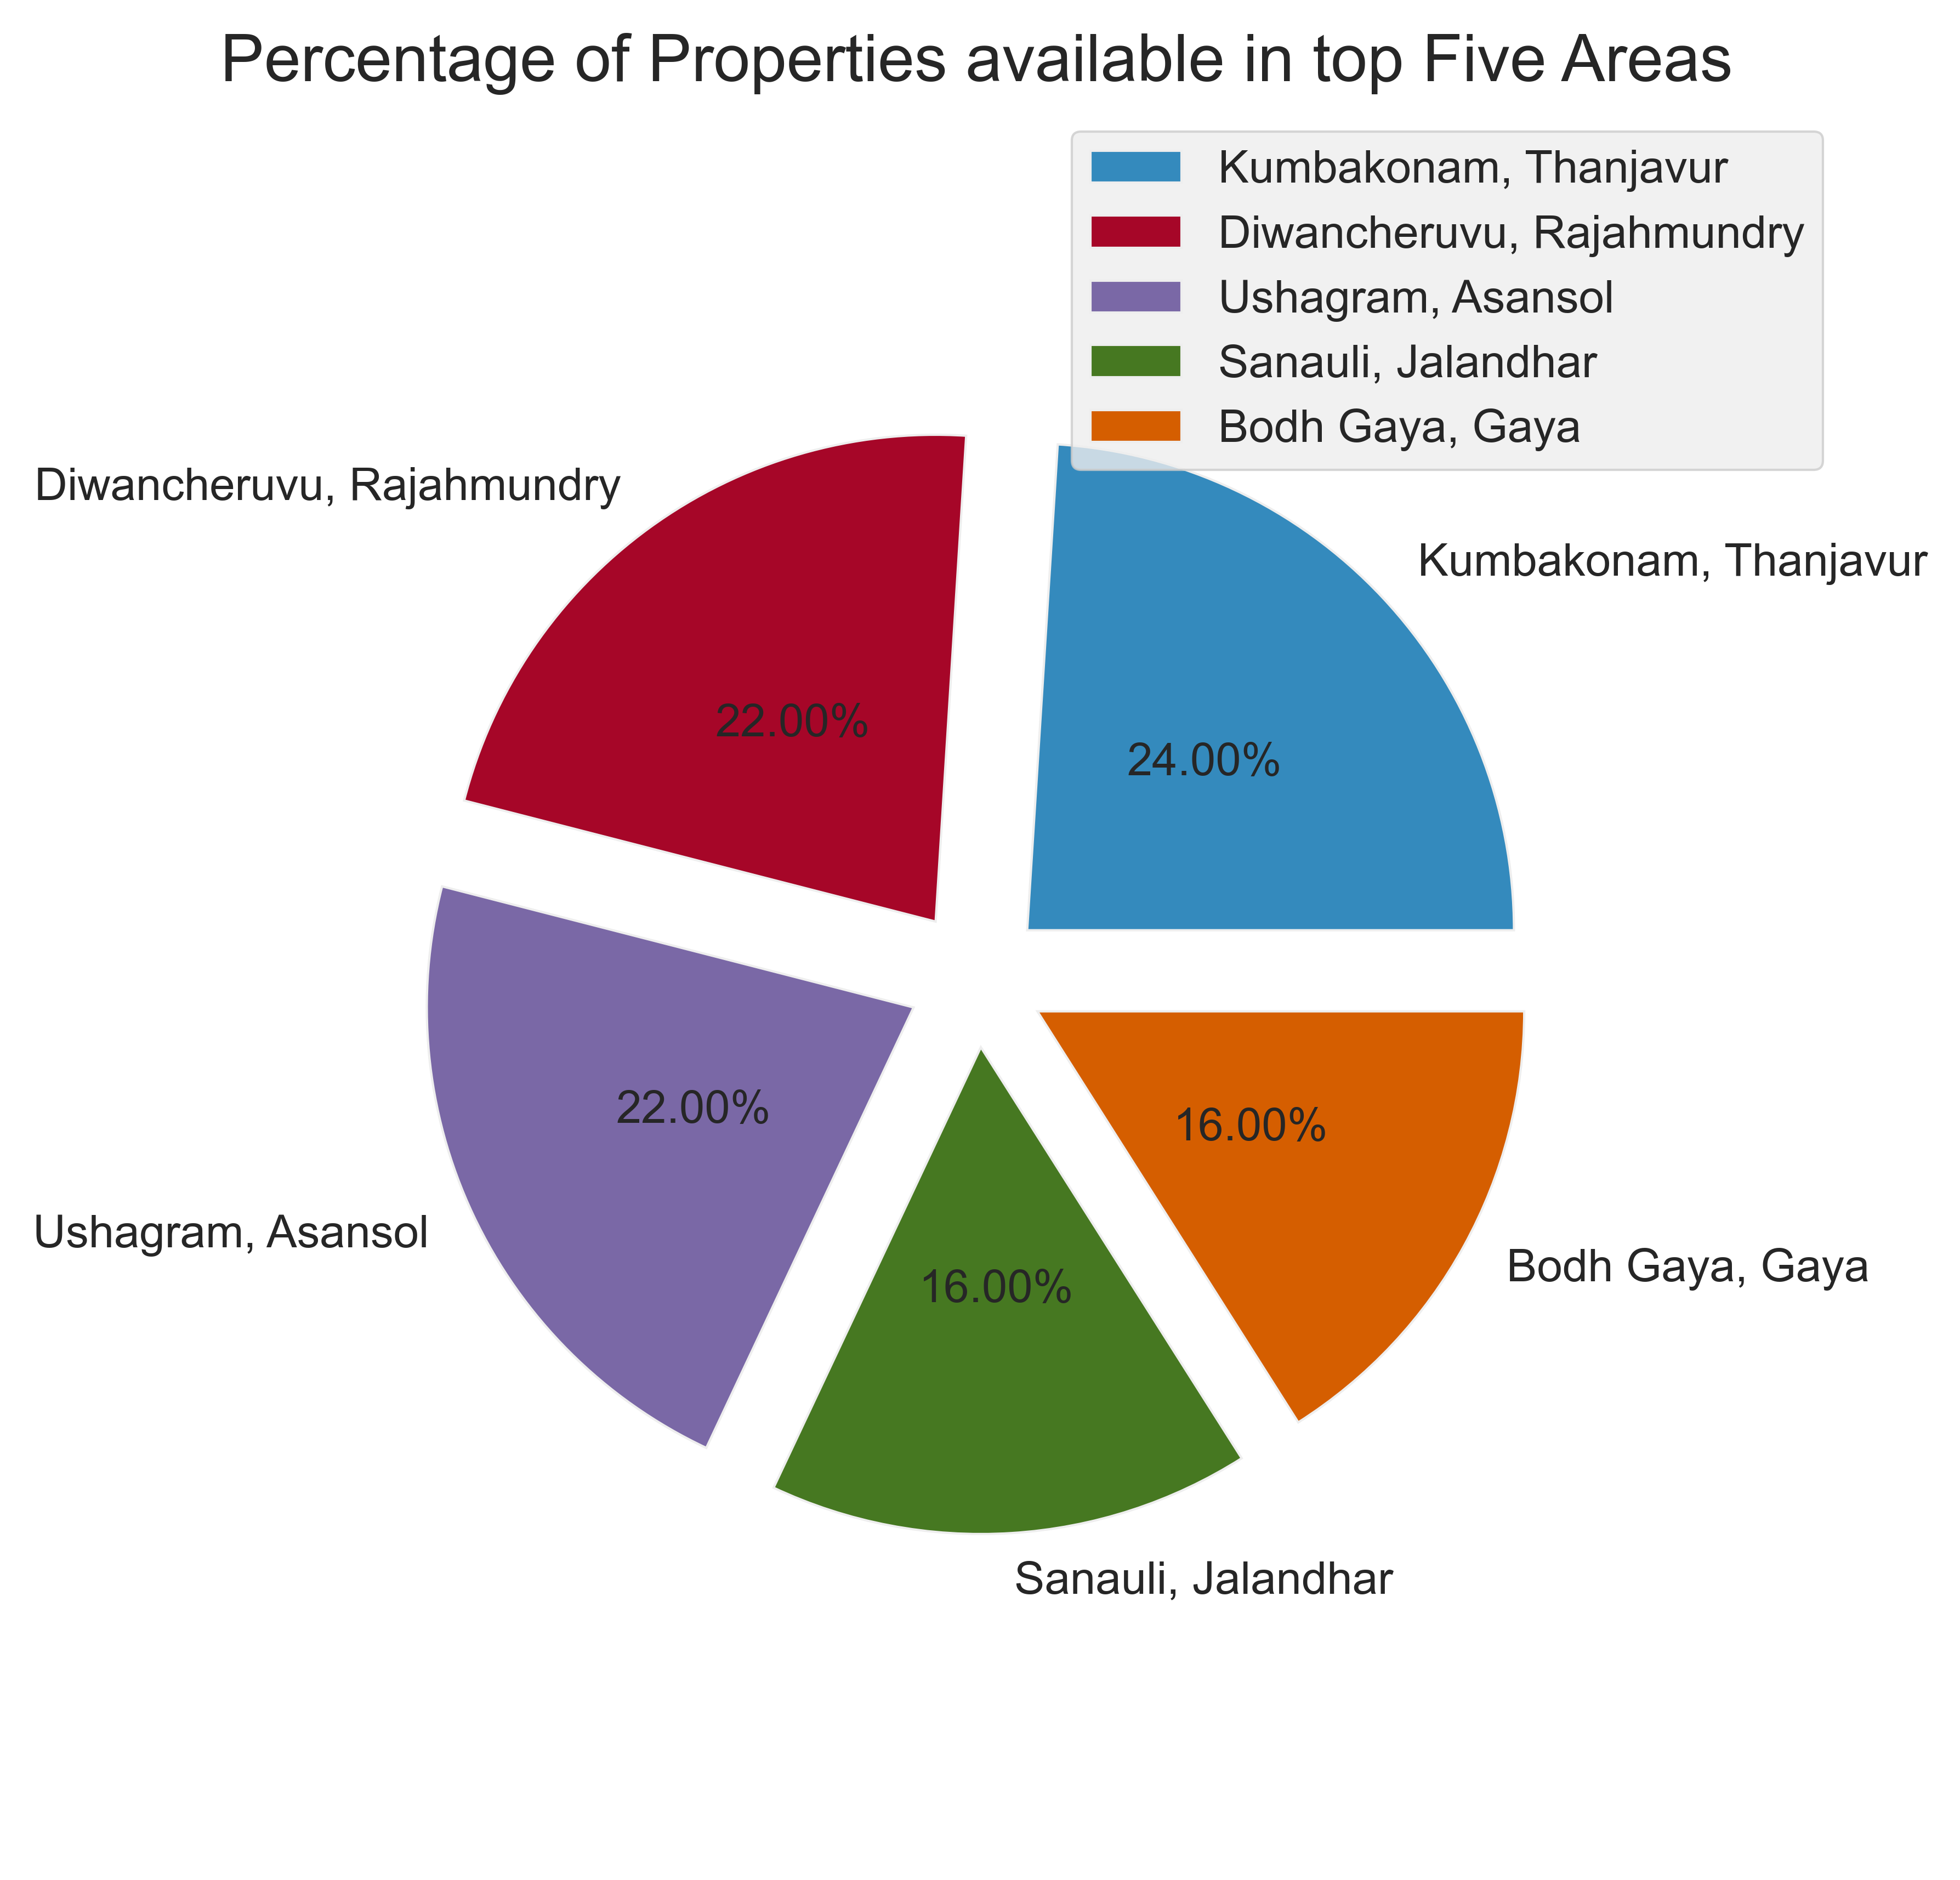

In [57]:
plt.figure(figsize=(7,7), dpi = 300)
explode = (0.1,0.1,0.1,0.1,0.1)
plt.pie(x = dff3.Location.value_counts().values[0:5],
        labels = dff3.Location.value_counts().index[0:5], autopct = '%.2f%%', radius = 0.7, pctdistance=0.5,explode =explode)
plt.title('Percentage of Properties available in top Five Areas')
plt.legend(loc = 'upper right')
plt.show();

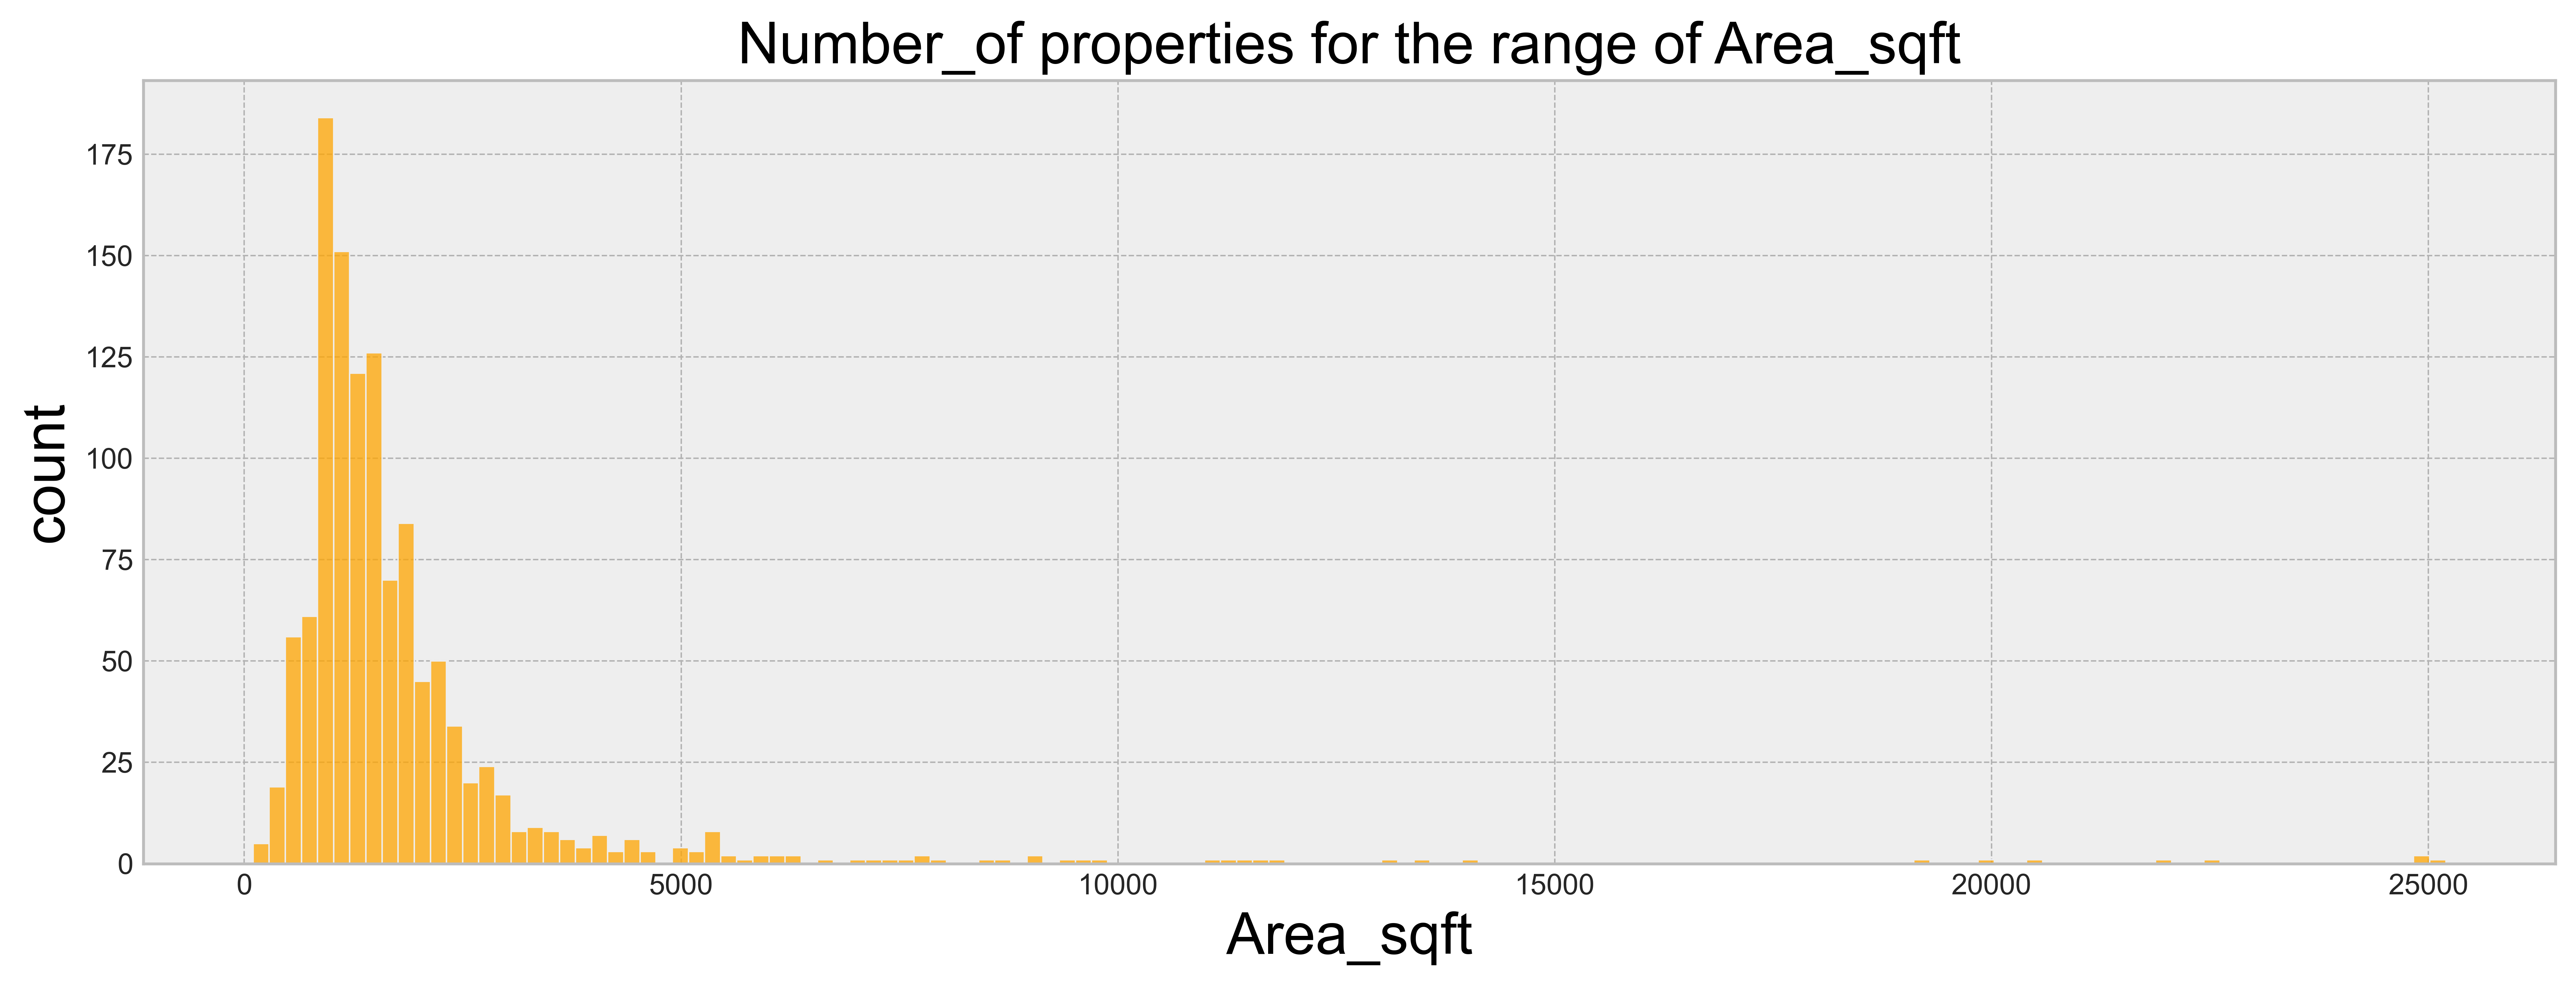

In [58]:
plt.figure(figsize=(15,5), dpi=300)
plt.title('Number_of properties for the range of Area_sqft', fontsize=20, color = 'Black')
plt.xlabel('Area_sqft',fontsize = 20, color = 'black')
plt.ylabel('count',fontsize = 20, color = 'black')
sns.histplot( x ='Area_sqft', data = dff3, color = 'orange');

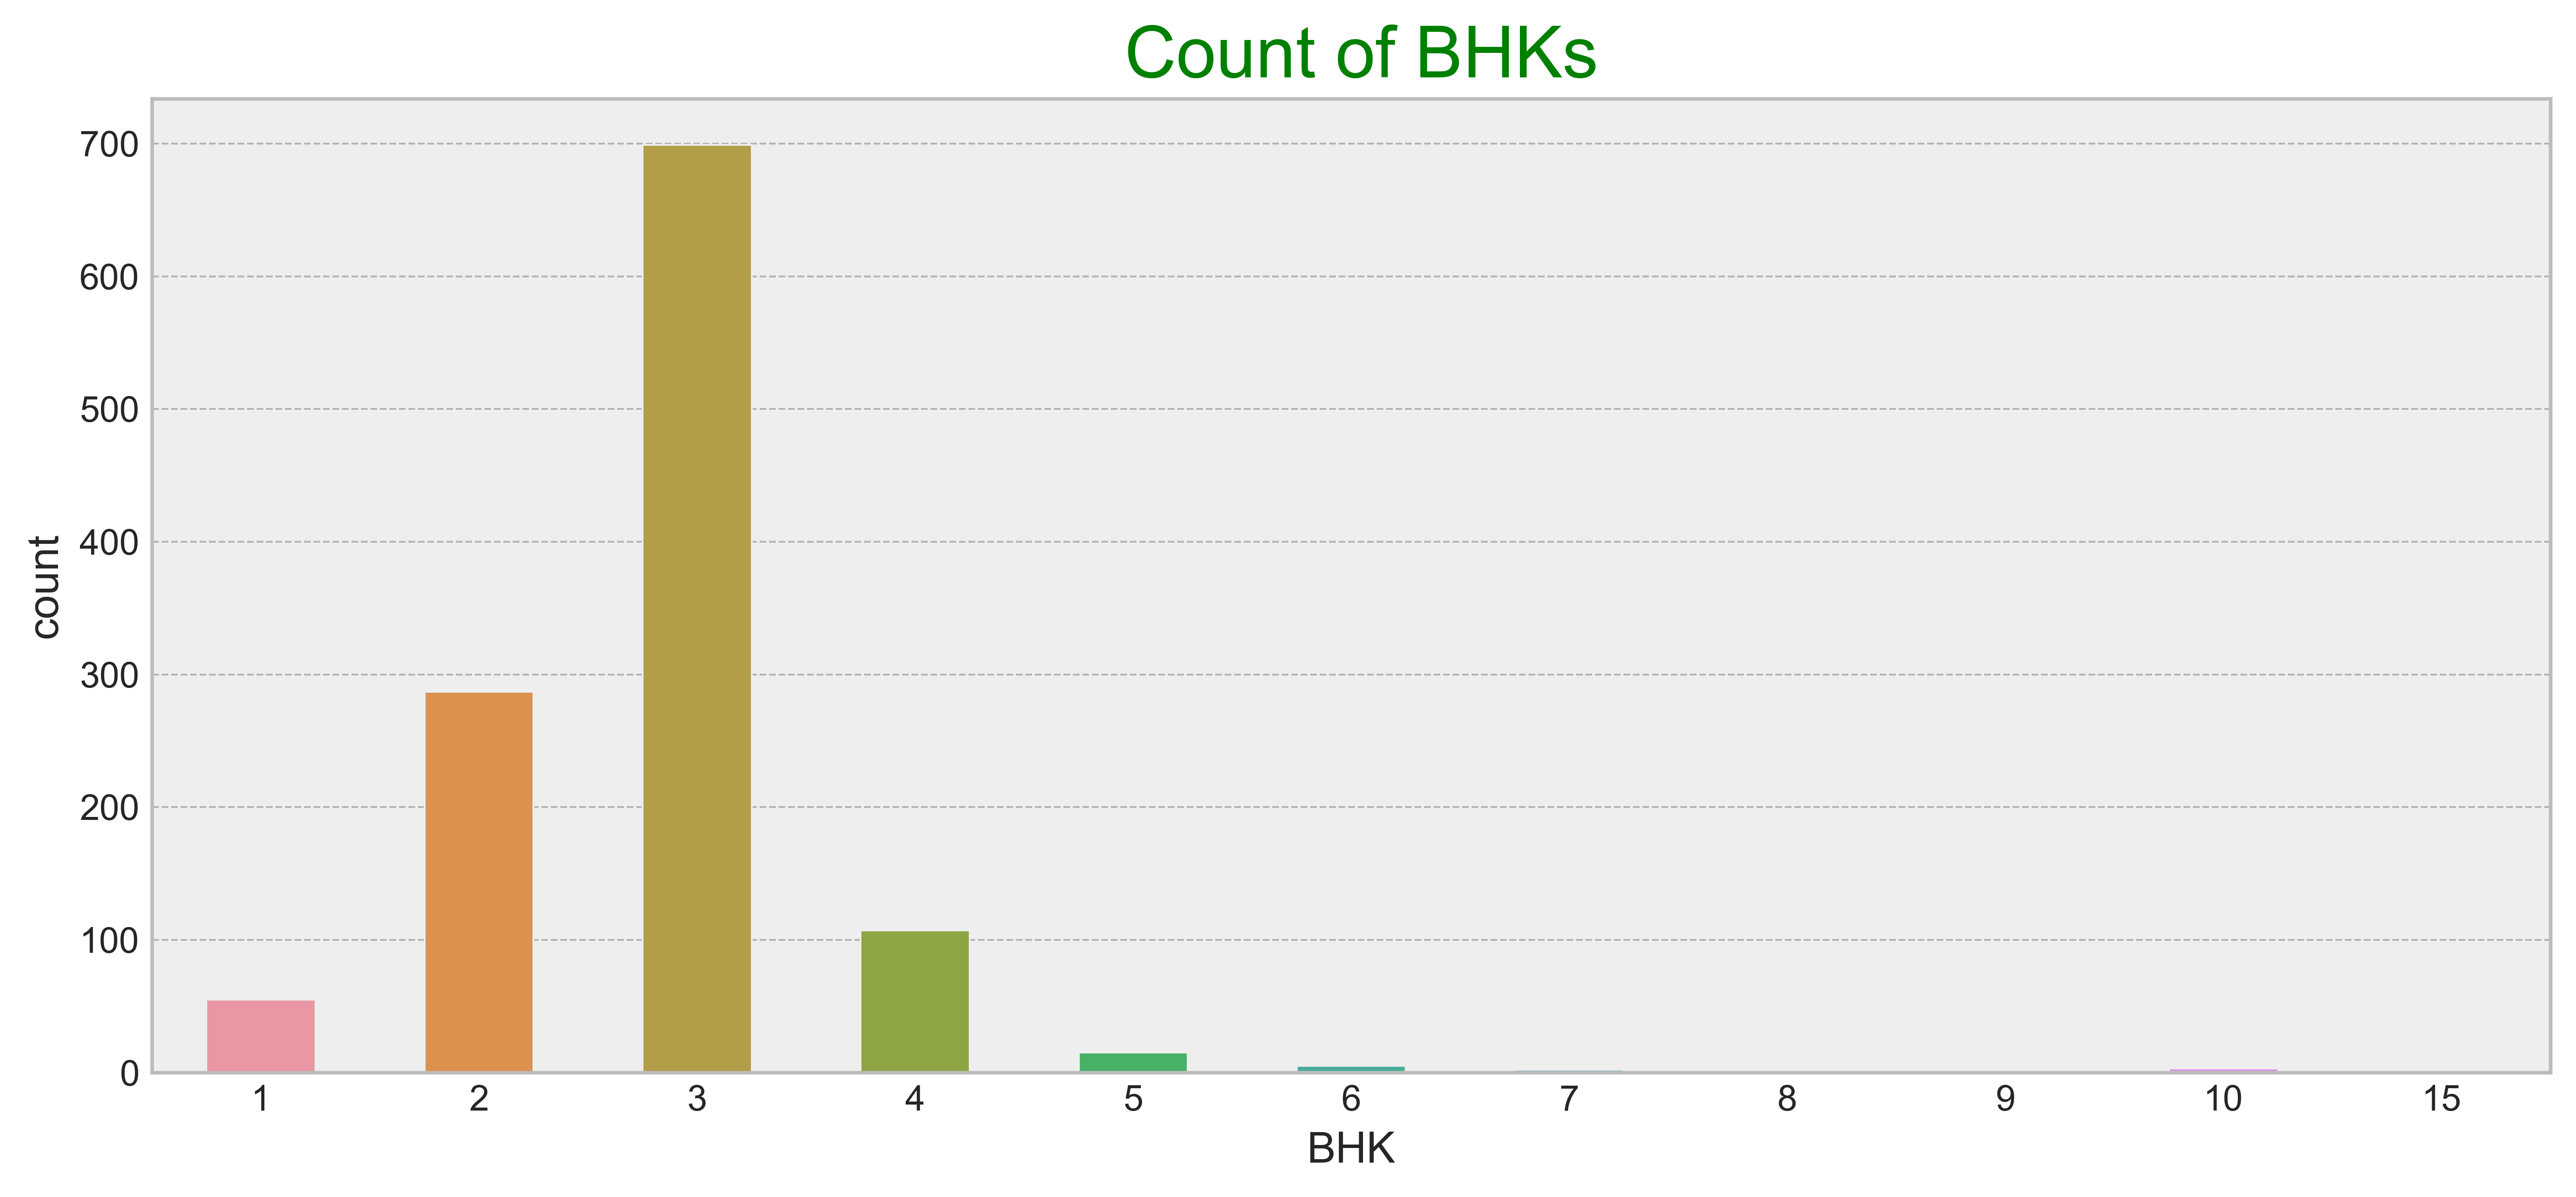

In [59]:
plt.figure(figsize=(12,5), dpi = 300)
plt.title(' Count of BHKs', color = 'Green',fontsize=20)
sns.countplot(x=dff3.BHK, width = 0.5);

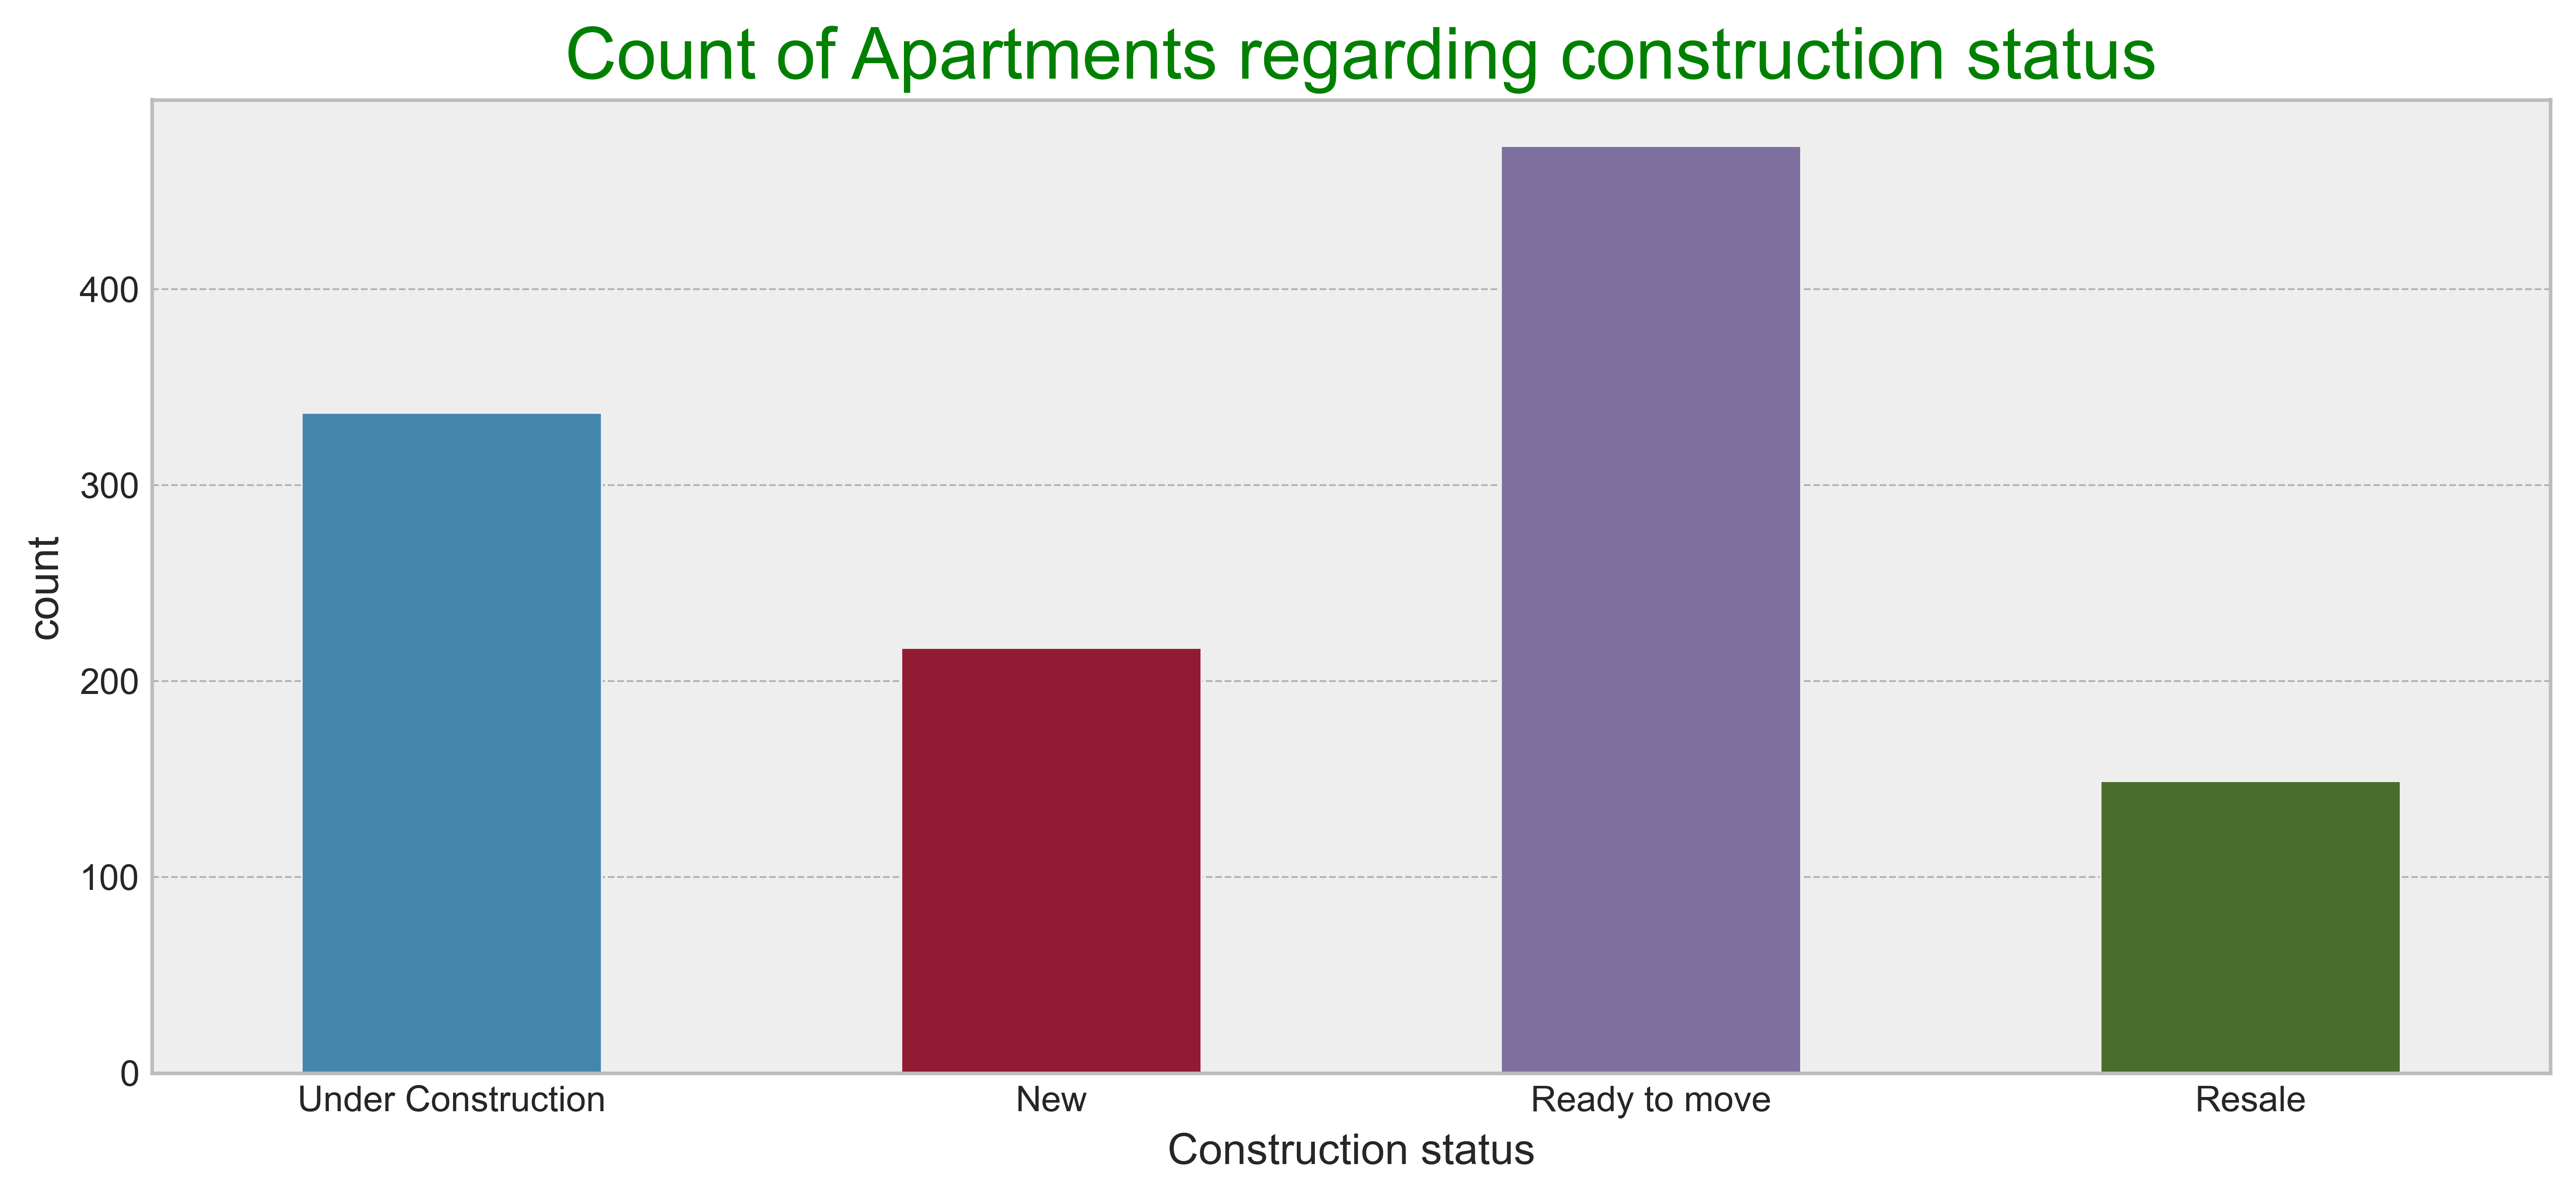

In [60]:
plt.figure(figsize=(12,5), dpi = 300)
plt.title(' Count of Apartments regarding construction status', color = 'Green',fontsize=20)
sns.countplot(x=dff3['Construction status'], width = 0.5);

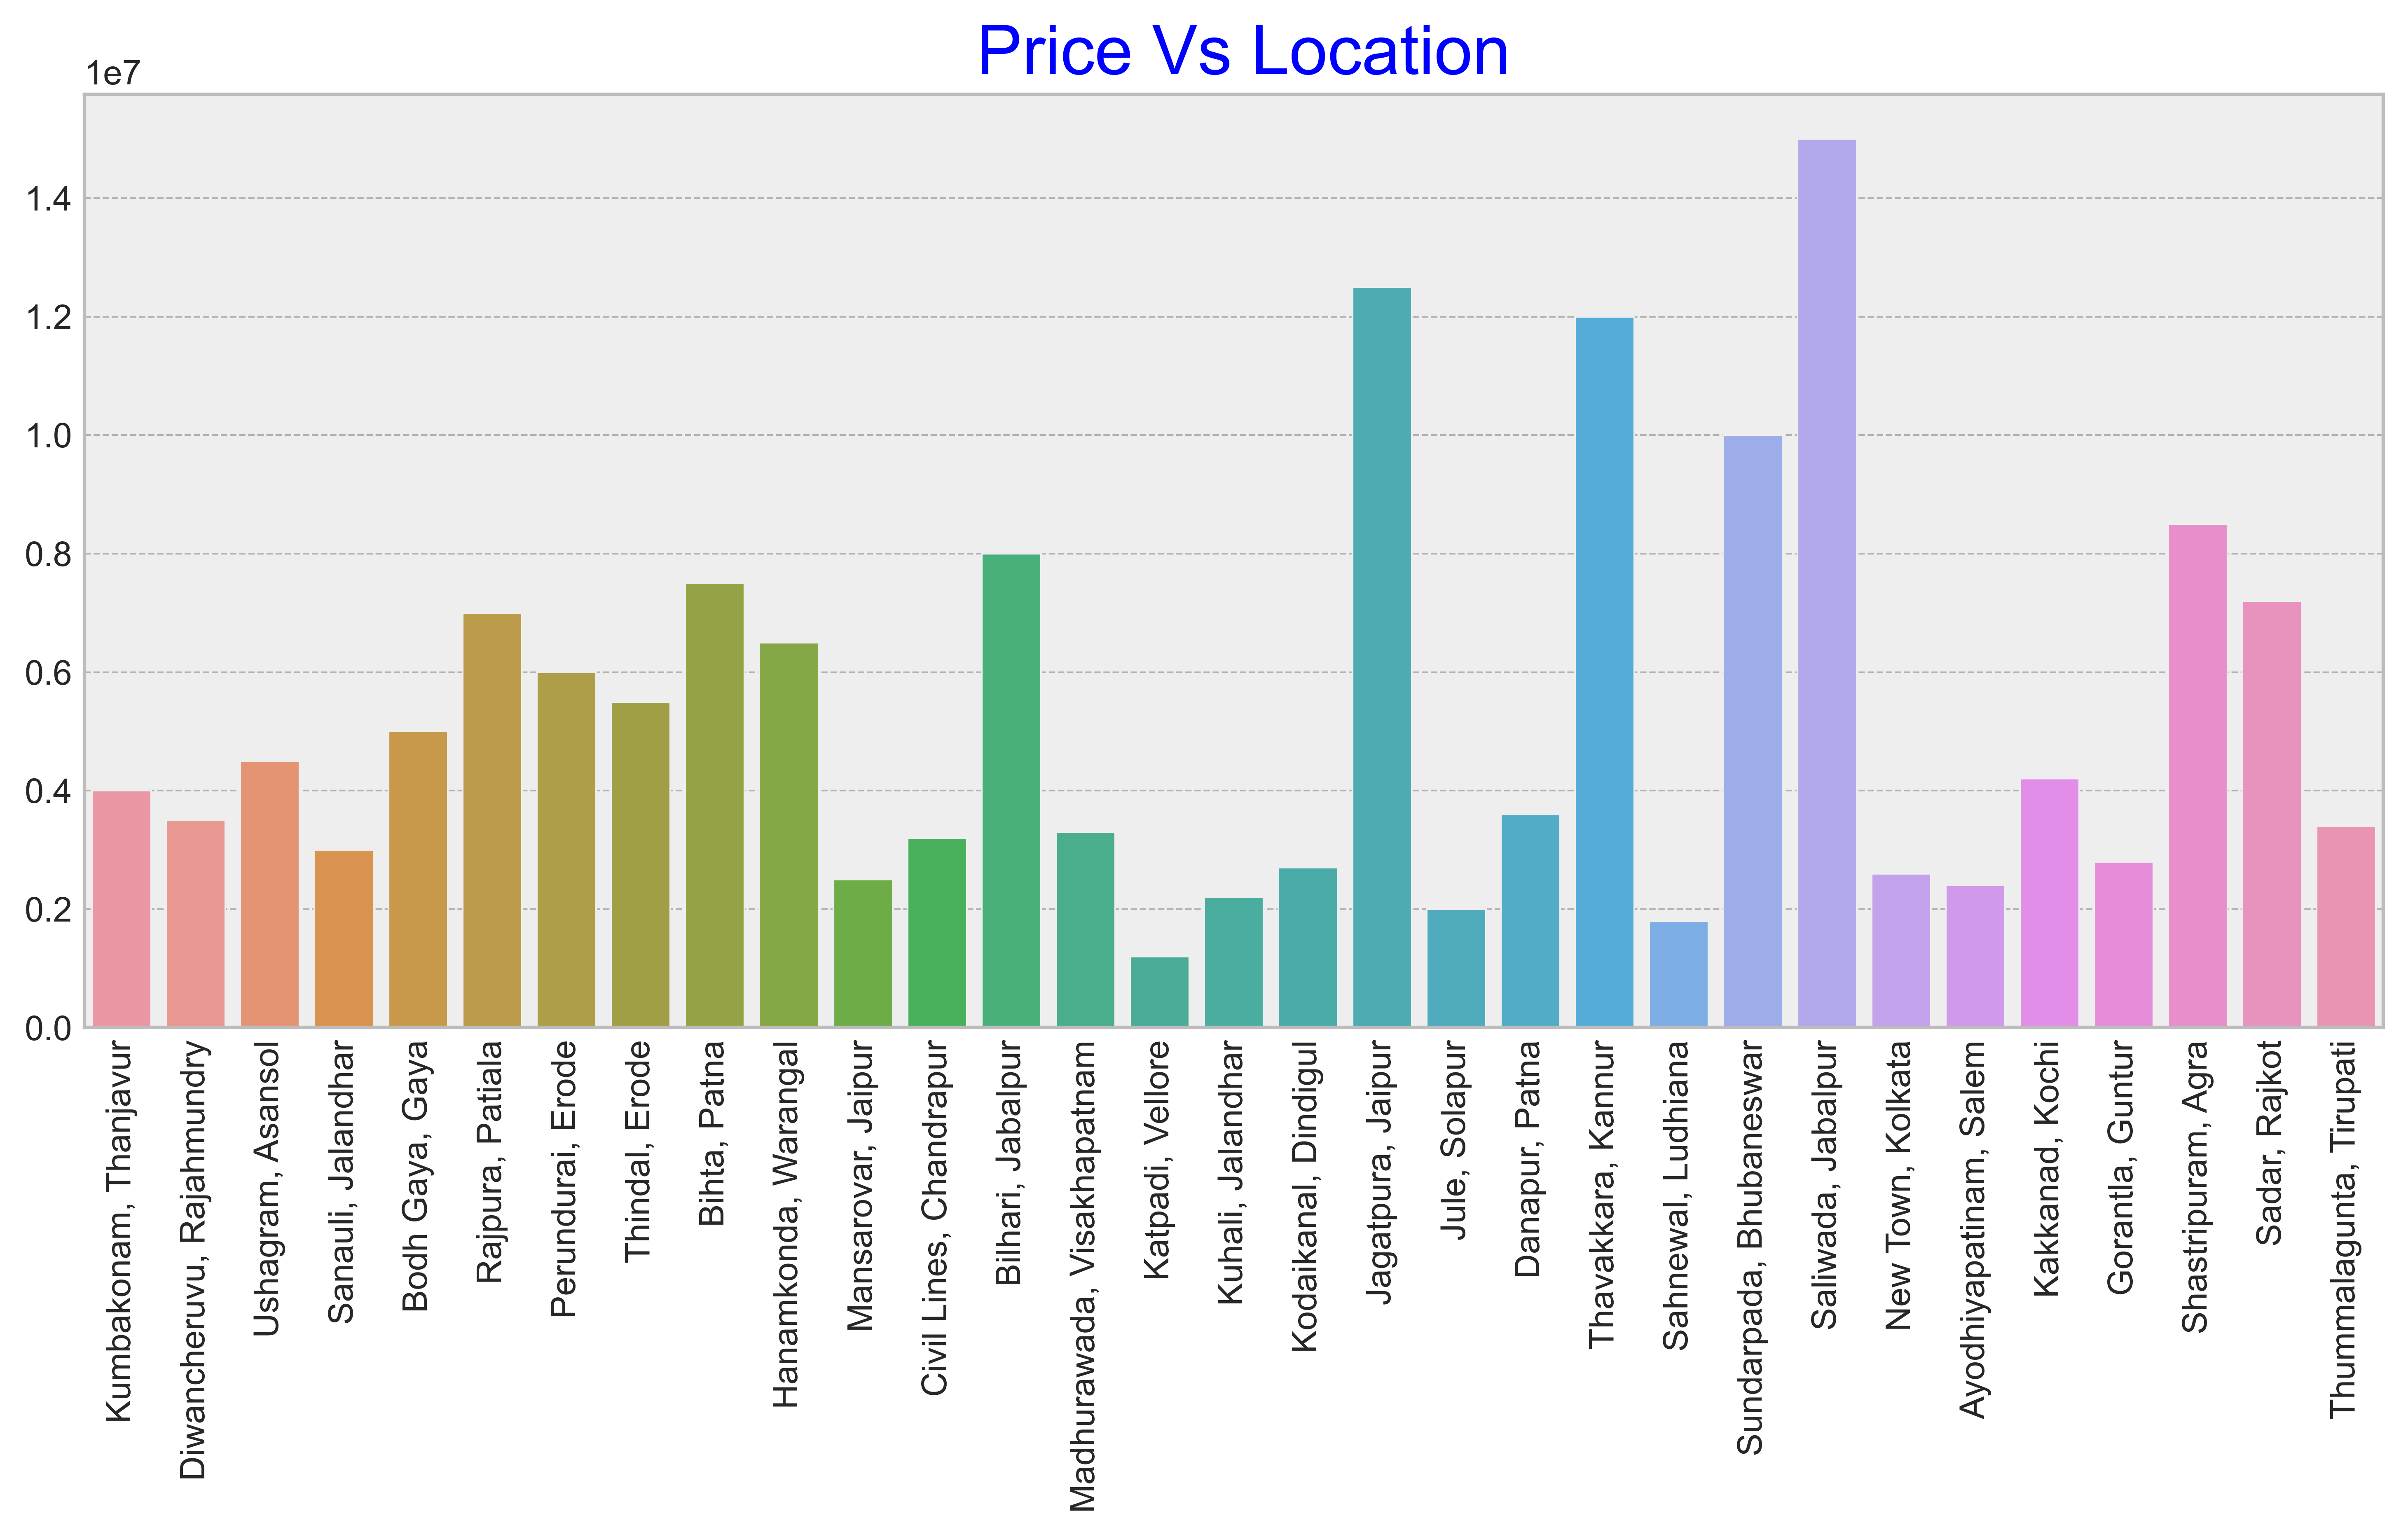

In [61]:
plt.figure(figsize=(12,5), dpi = 300)
plt.title(' Price Vs Location', color = 'blue',fontsize=20)
plt.xticks(rotation = 90)
sns.barplot(y=dff3.Price.value_counts().index[0:31], x= dff3.Location.value_counts().index[0:31], ci= False, estimator='median' );

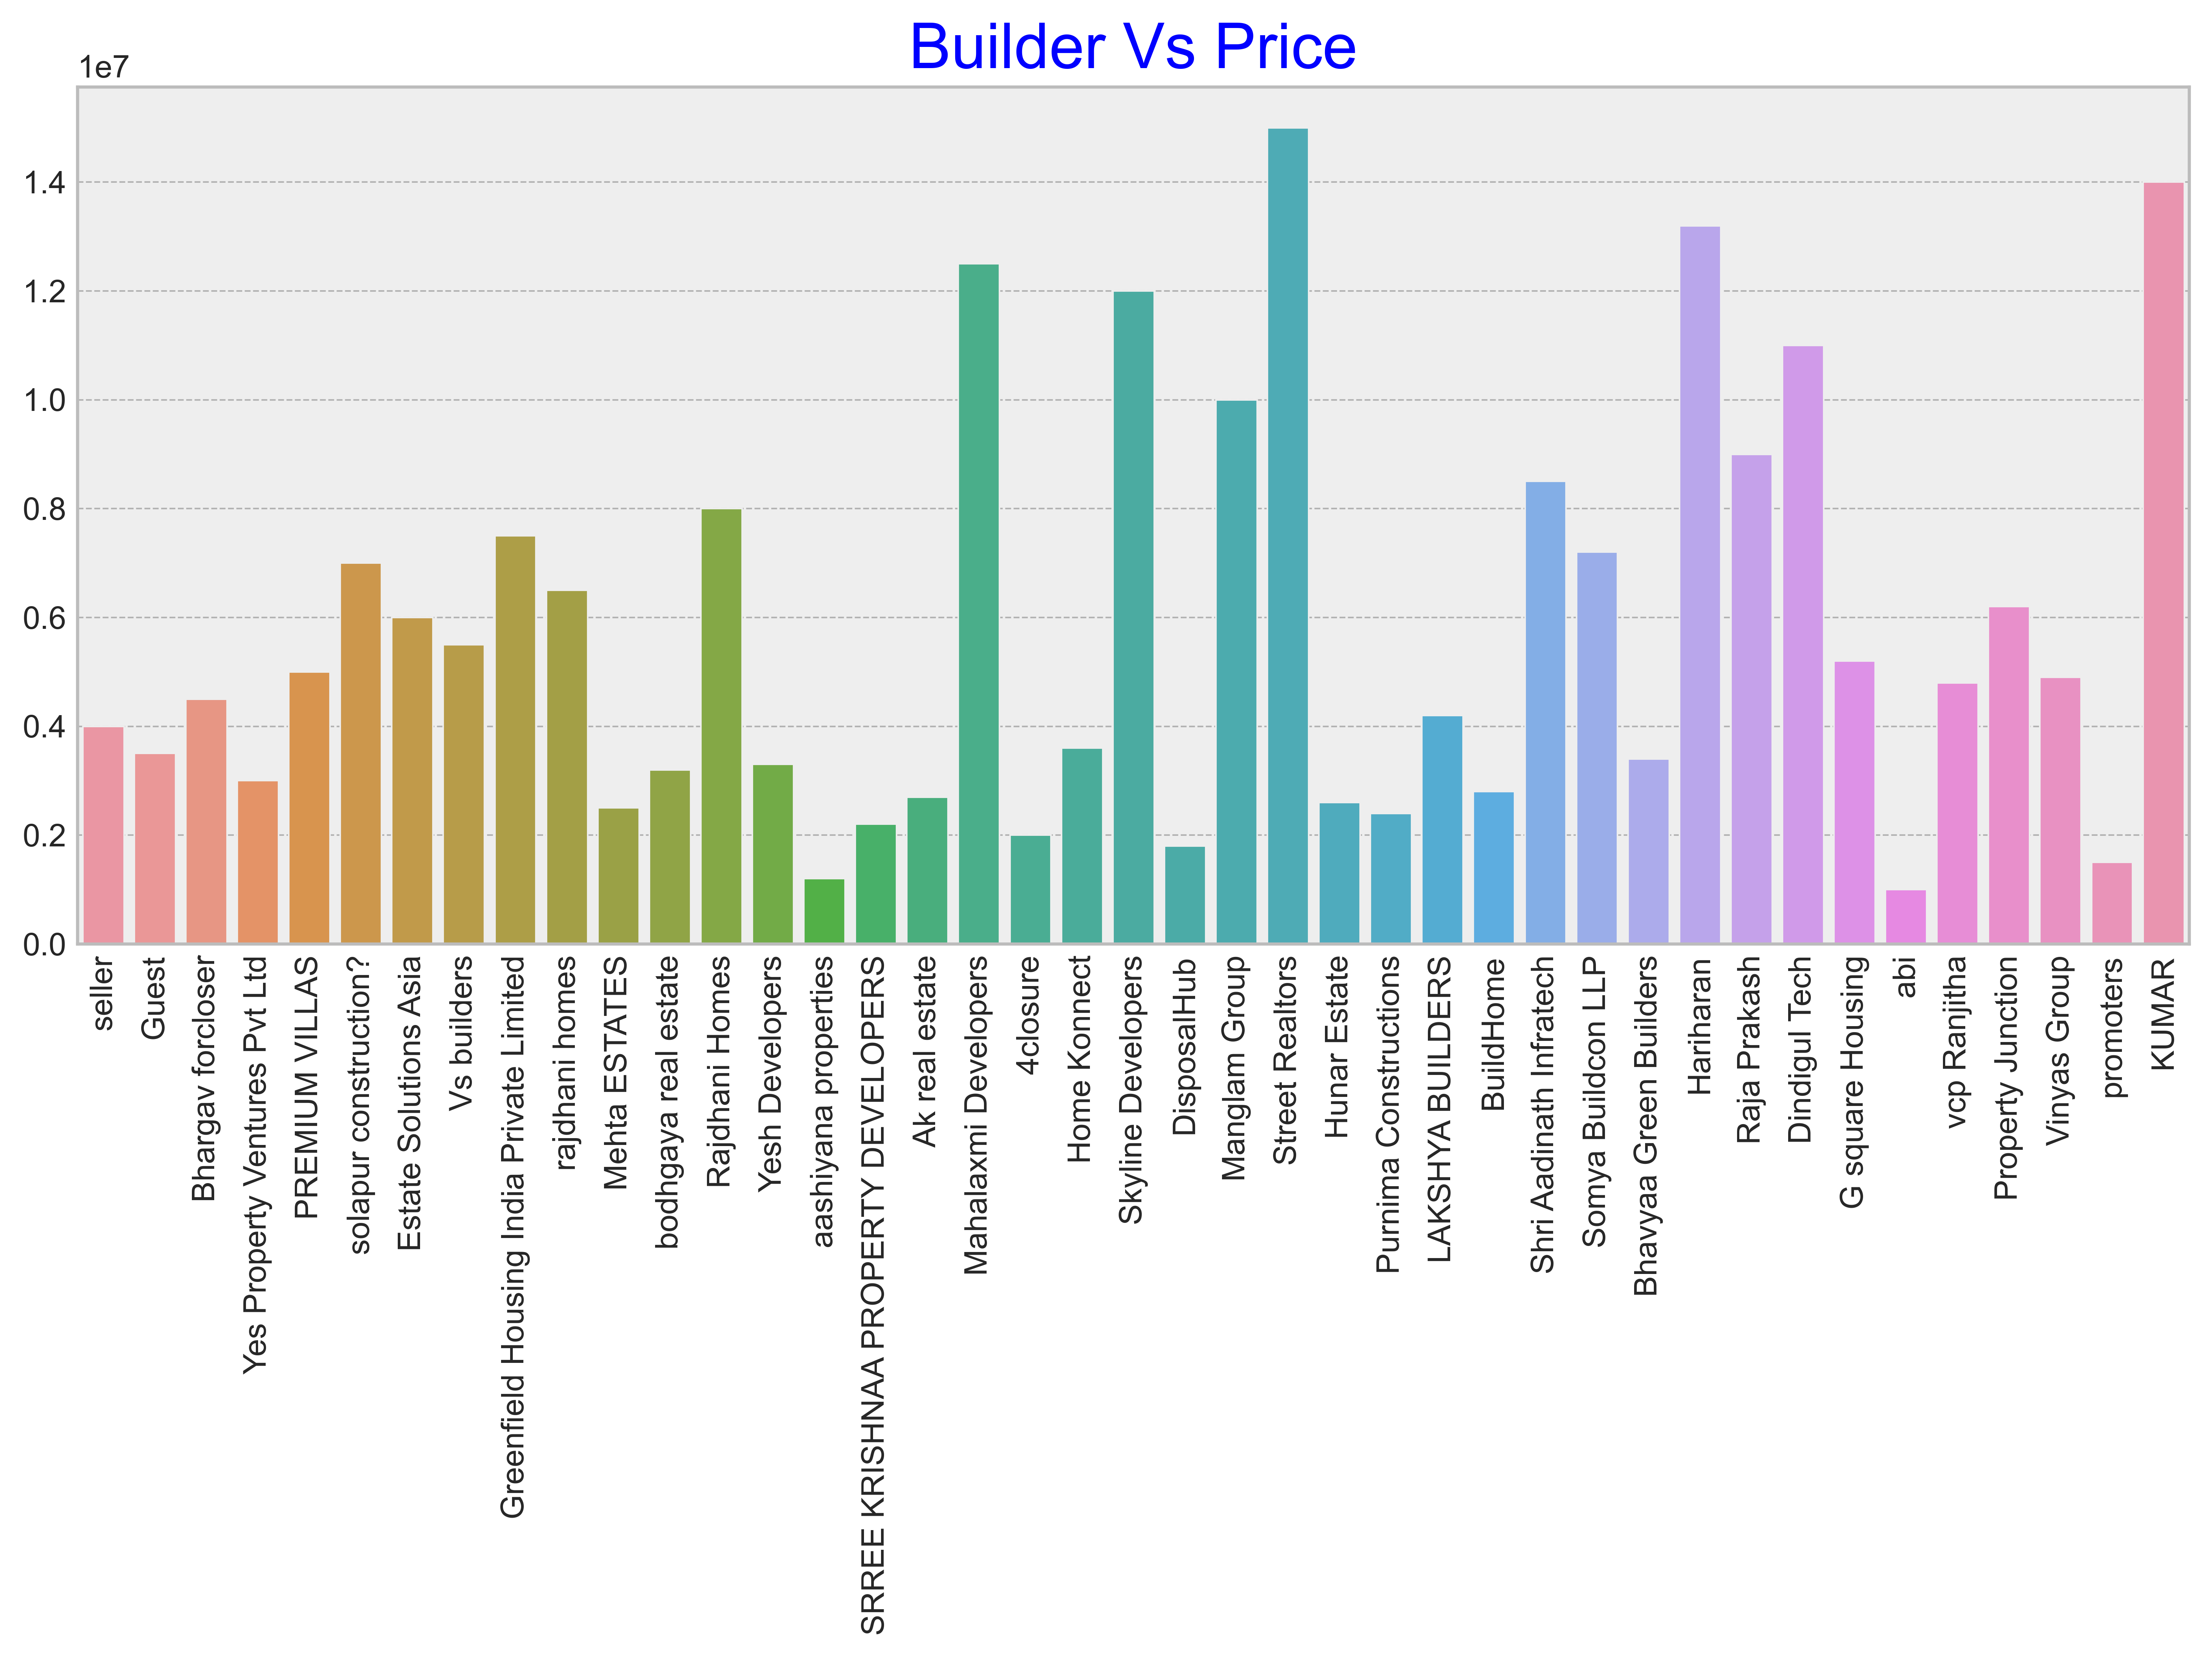

In [74]:
plt.figure(figsize=(12,5), dpi = 300)
plt.title('Builder Vs Price', color = 'blue',fontsize=20)
plt.xticks(rotation = 90)
sns.barplot(y=dff3.Price.value_counts().index[0:41], x= dff3['Seller Name'].value_counts().index[0:41], ci= False, estimator='median' );

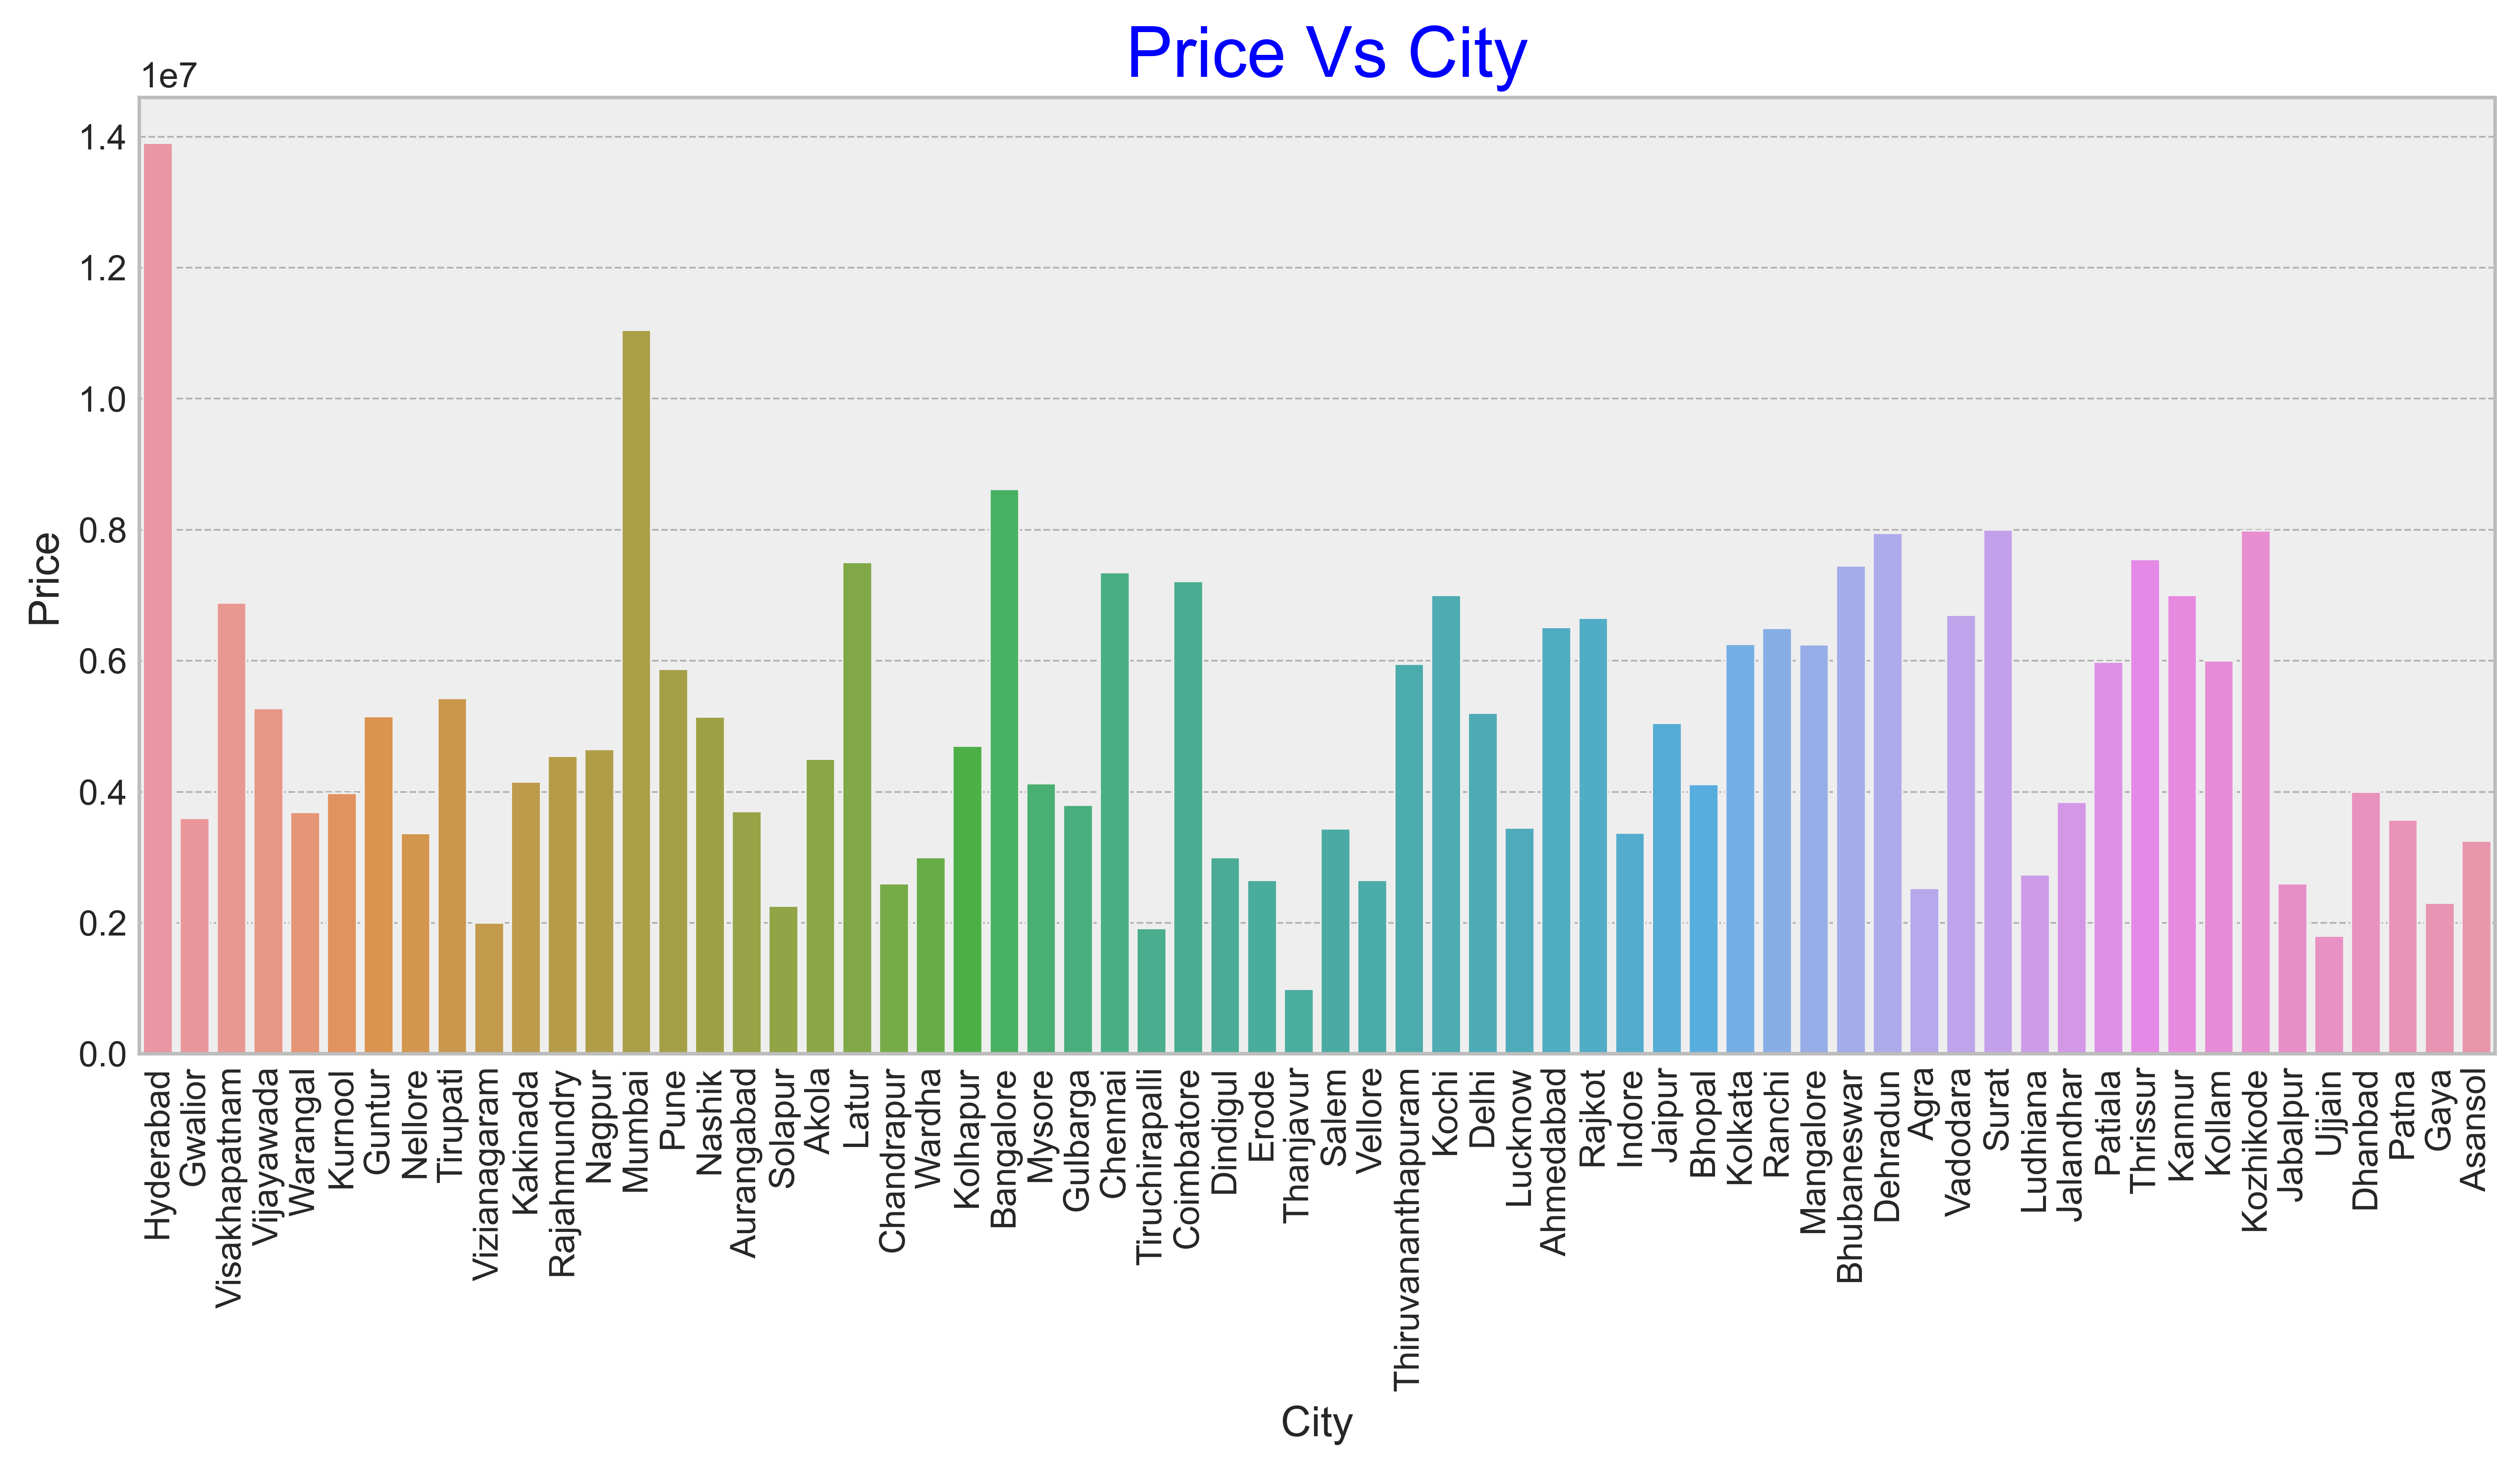

In [63]:
plt.figure(figsize=(12,5), dpi = 300)
plt.title(' Price Vs City', color = 'blue',fontsize=20)
plt.xticks(rotation = 90)
sns.barplot(y=dff3.Price, x= dff3.City, ci= False, estimator='median' );

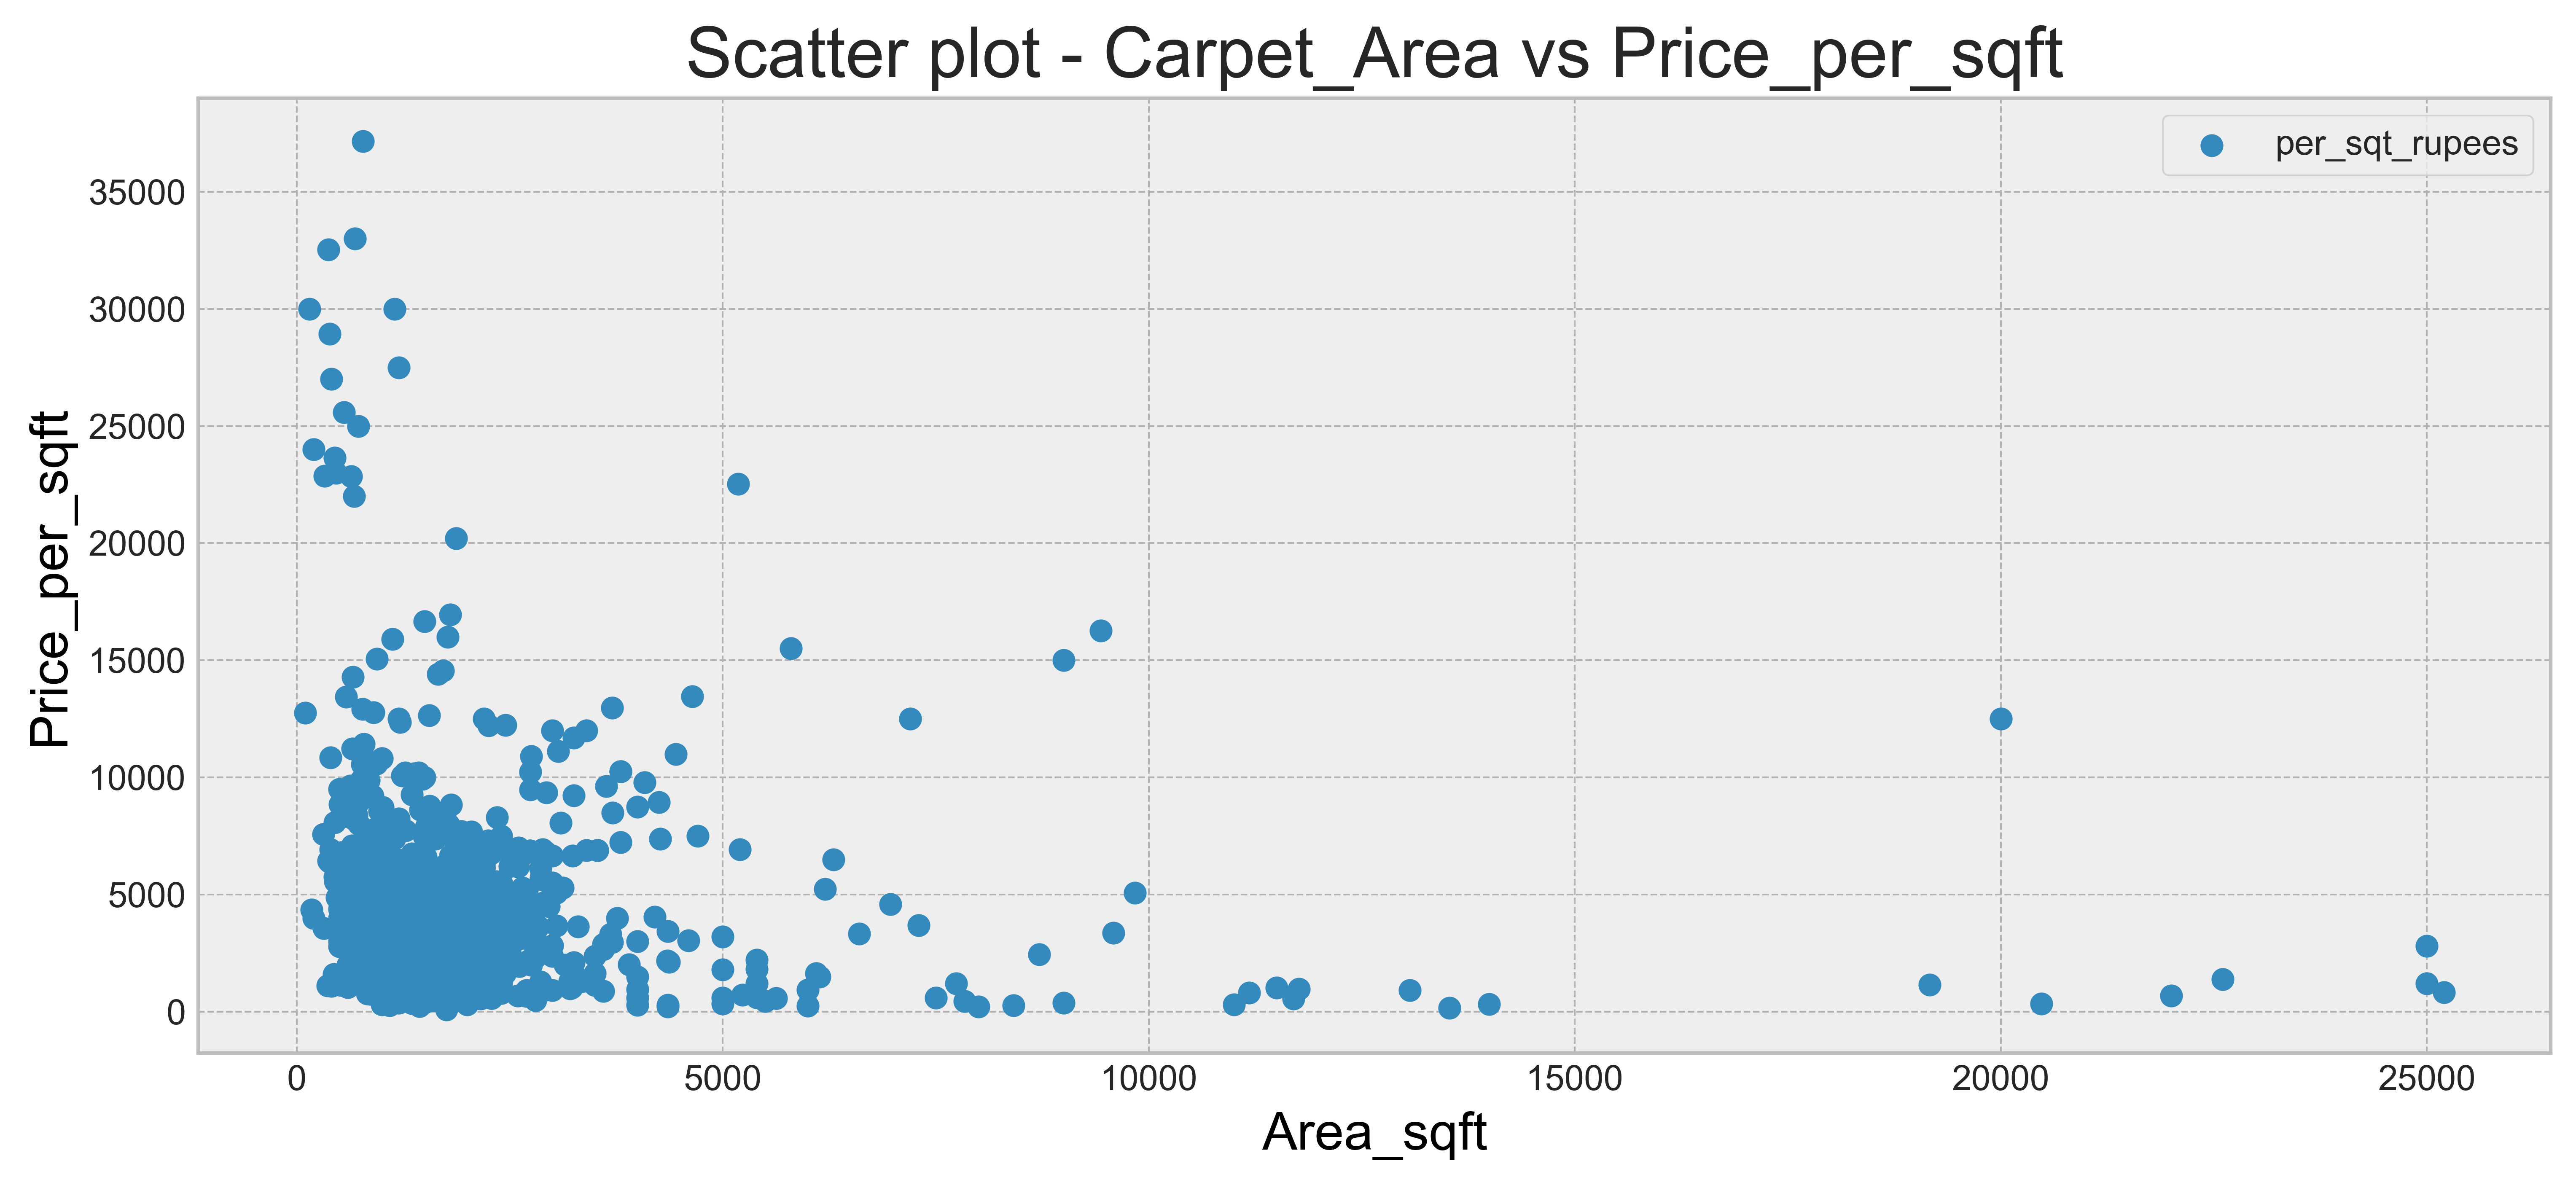

In [64]:
plt.figure(figsize=(12,5), dpi = 300)
plt.scatter(dff3.Area_sqft, dff3.Price_per_sqft, label = 'per_sqt_rupees')

plt.title('Scatter plot - Carpet_Area vs Price_per_sqft', fontsize=20)

plt.xlabel('Area_sqft',fontsize = 15, color = 'black')
plt.ylabel('Price_per_sqft',fontsize = 15, color = 'black')
plt.legend()
plt.show();

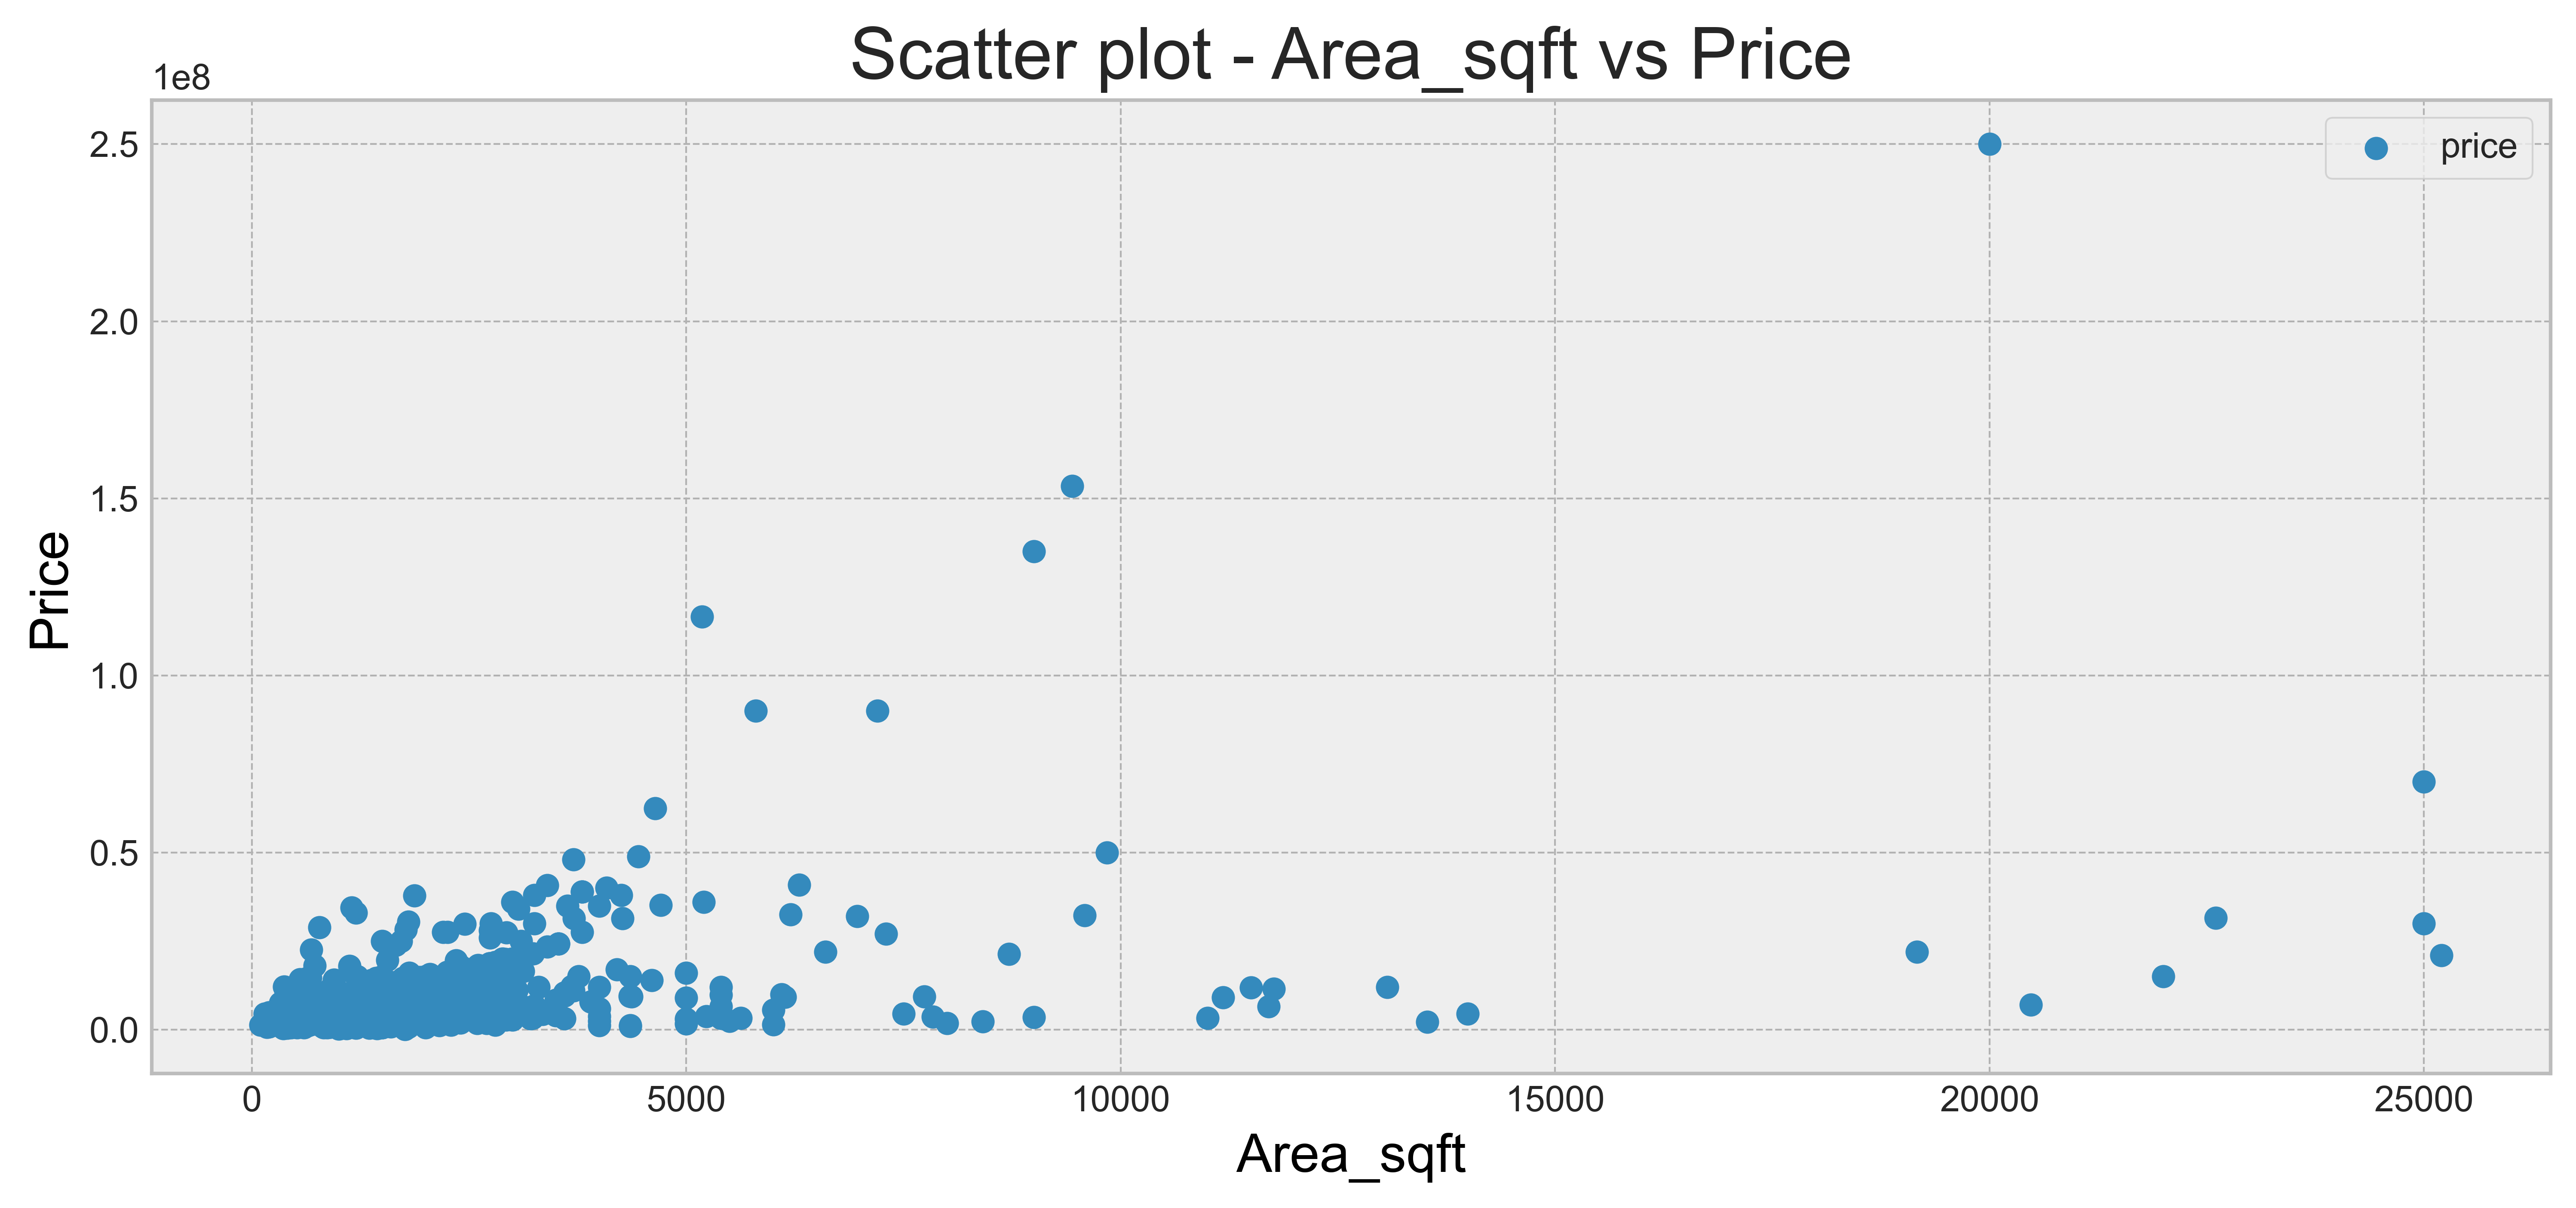

In [65]:
plt.figure(figsize=(12,5), dpi = 300)
plt.scatter(dff3.Area_sqft, dff3.Price, label = 'price')

plt.title('Scatter plot - Area_sqft vs Price', fontsize=20)
plt.xlabel('Area_sqft',fontsize = 15, color = 'black')
plt.ylabel('Price',fontsize = 15, color = 'black')
plt.legend()
plt.show();

In [66]:
pd.crosstab(index=dff3.City, columns=dff3.BHK)

BHK            1   2   3   4   5   6   7   8   9   10  15
City                                                     
Agra            0   5  14   1   0   0   0   0   0   0   0
Ahmedabad       1   9   7   3   0   0   0   0   0   0   0
Akola           0   2   1   0   0   0   0   0   0   0   0
Asansol         0   6  12   1   1   0   0   0   0   0   0
Aurangabad      1   8  11   0   0   0   0   0   0   0   0
...            ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..
Vijayawada      0   9  10   0   0   1   0   0   0   0   0
Visakhapatnam   0   7  13   0   0   0   0   0   0   0   0
Vizianagaram    0   3  17   0   0   0   0   0   0   0   0
Warangal        0   2  17   1   0   0   0   0   0   0   0
Wardha          0   5   3   0   0   0   0   0   0   0   0

[64 rows x 11 columns]

In [67]:
i=pd.crosstab(index=dff3.City, columns=dff3.BHK)

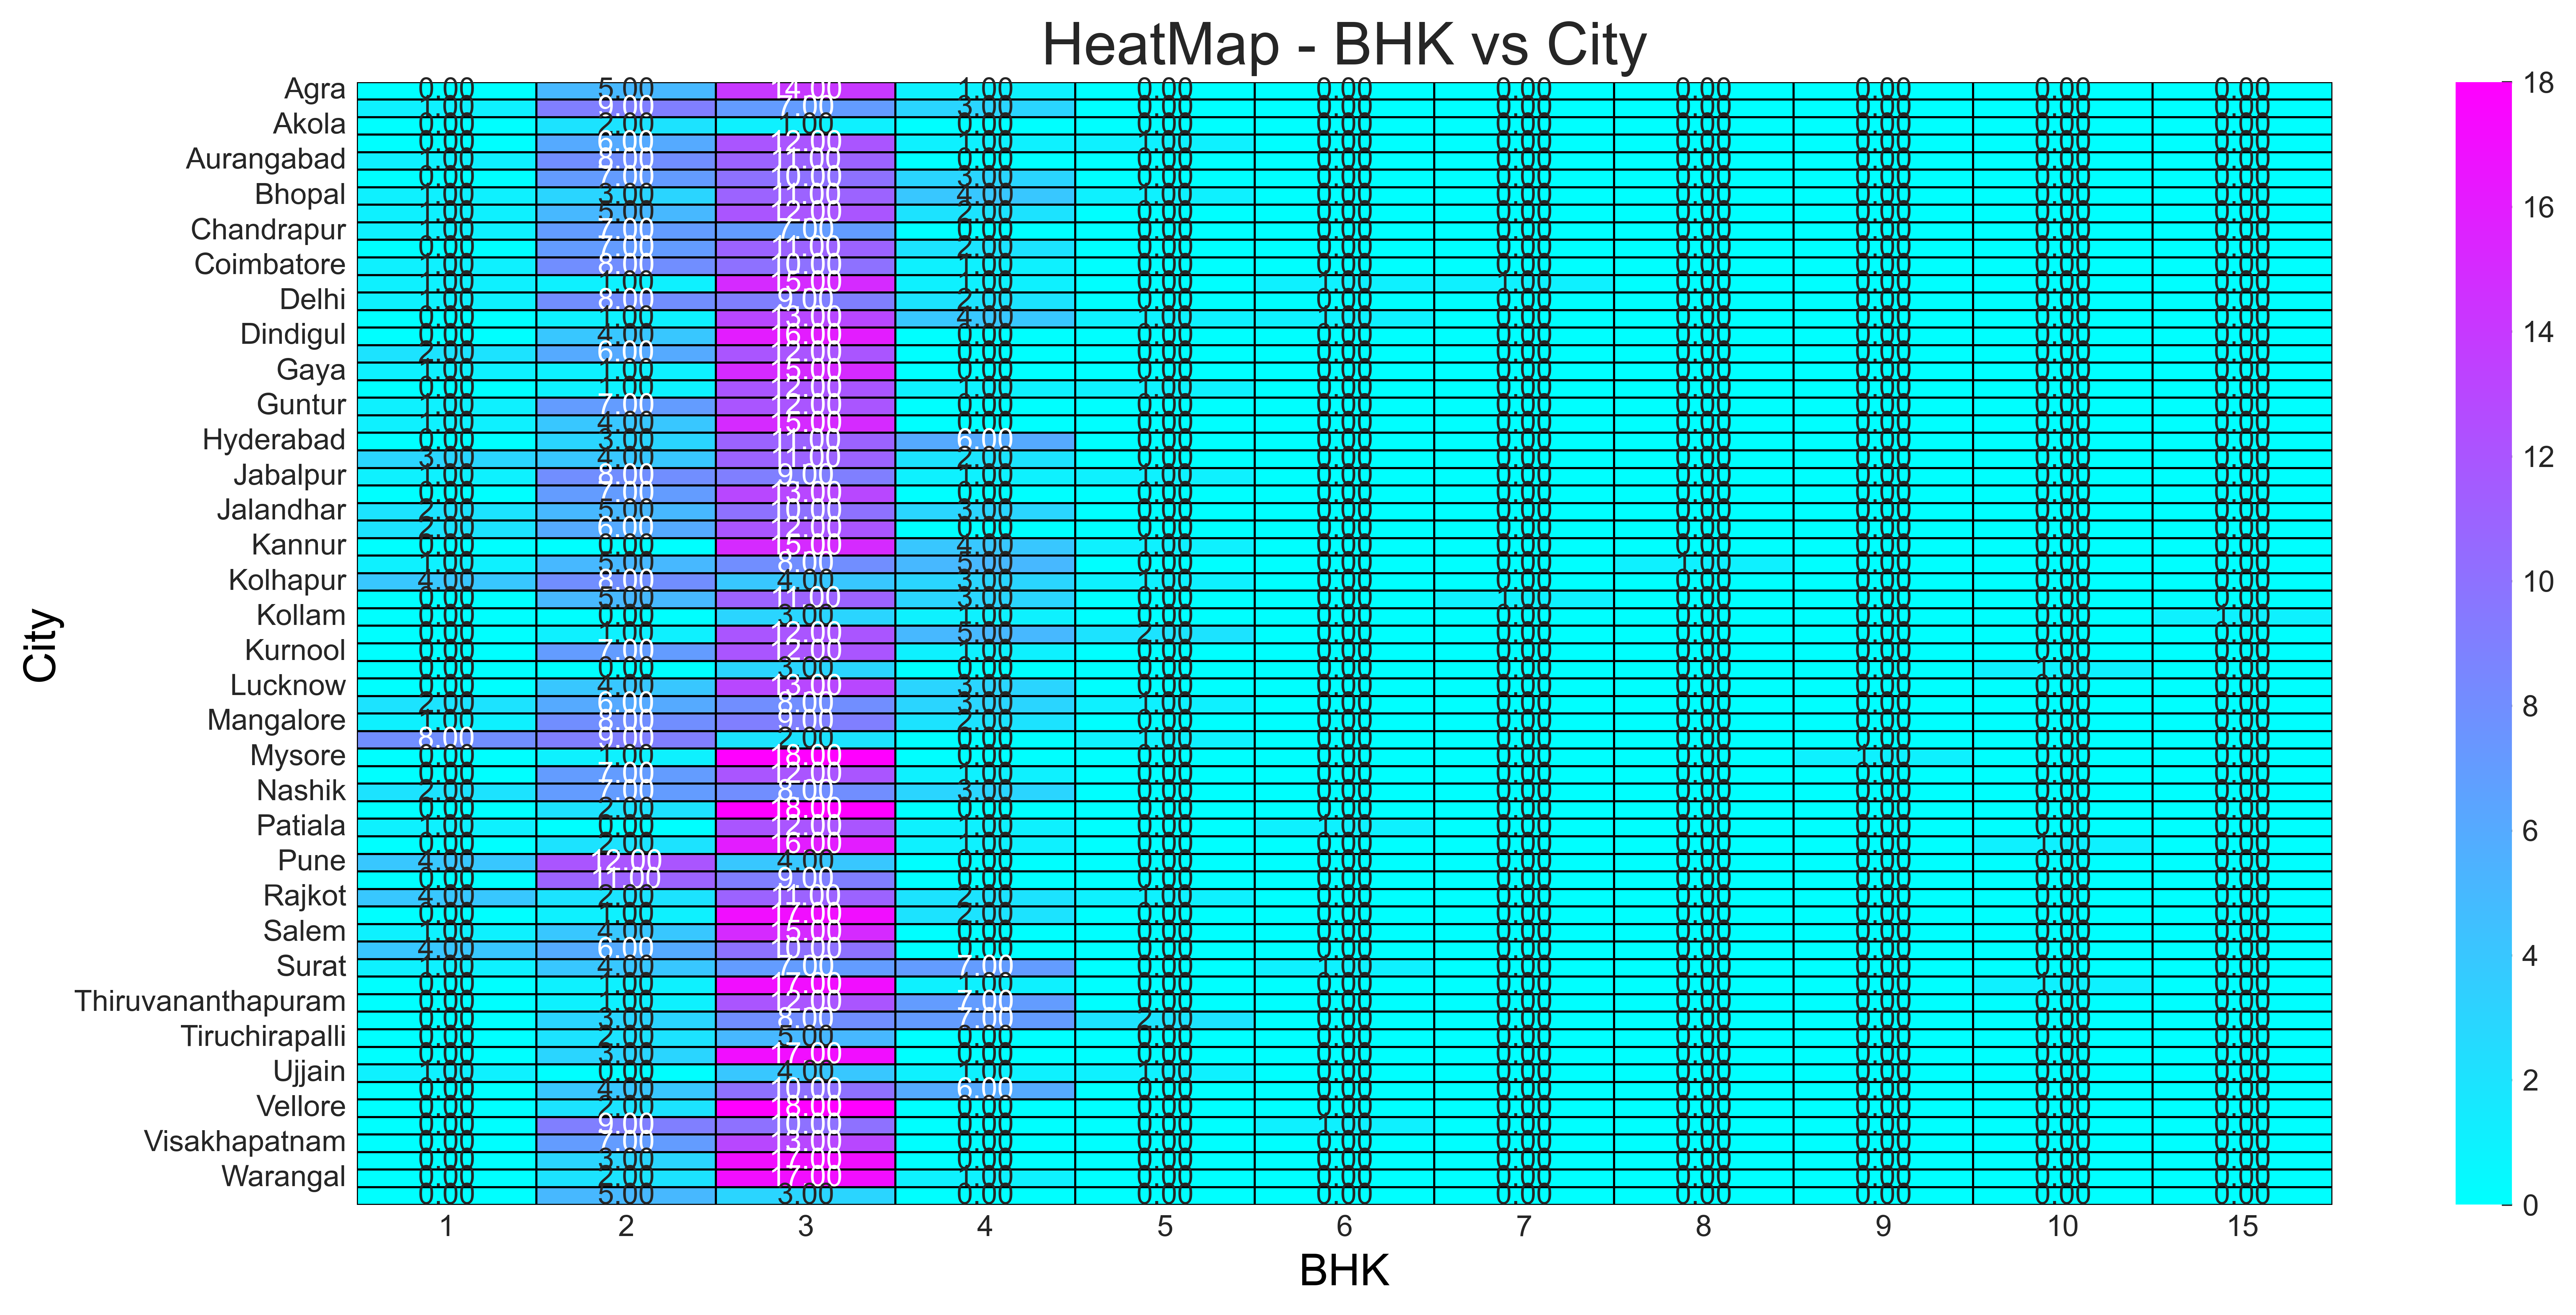

In [68]:
plt.figure(figsize=(15,7), dpi=300)
plt.title('HeatMap - BHK vs City', fontsize=20)
sns.heatmap(i, annot=True, fmt = '.2f', linewidths=0.5, cmap='cool', linecolor='black');
plt.xlabel('BHK',fontsize = 15, color = 'black')
plt.ylabel('City',fontsize = 15, color = 'black');
# fmt=d for integers; fmt = .2f for float with 2 decimals

In [69]:
dff3.BHK=dff3.BHK.astype(int)

In [70]:
data_cor = dff3.corr()

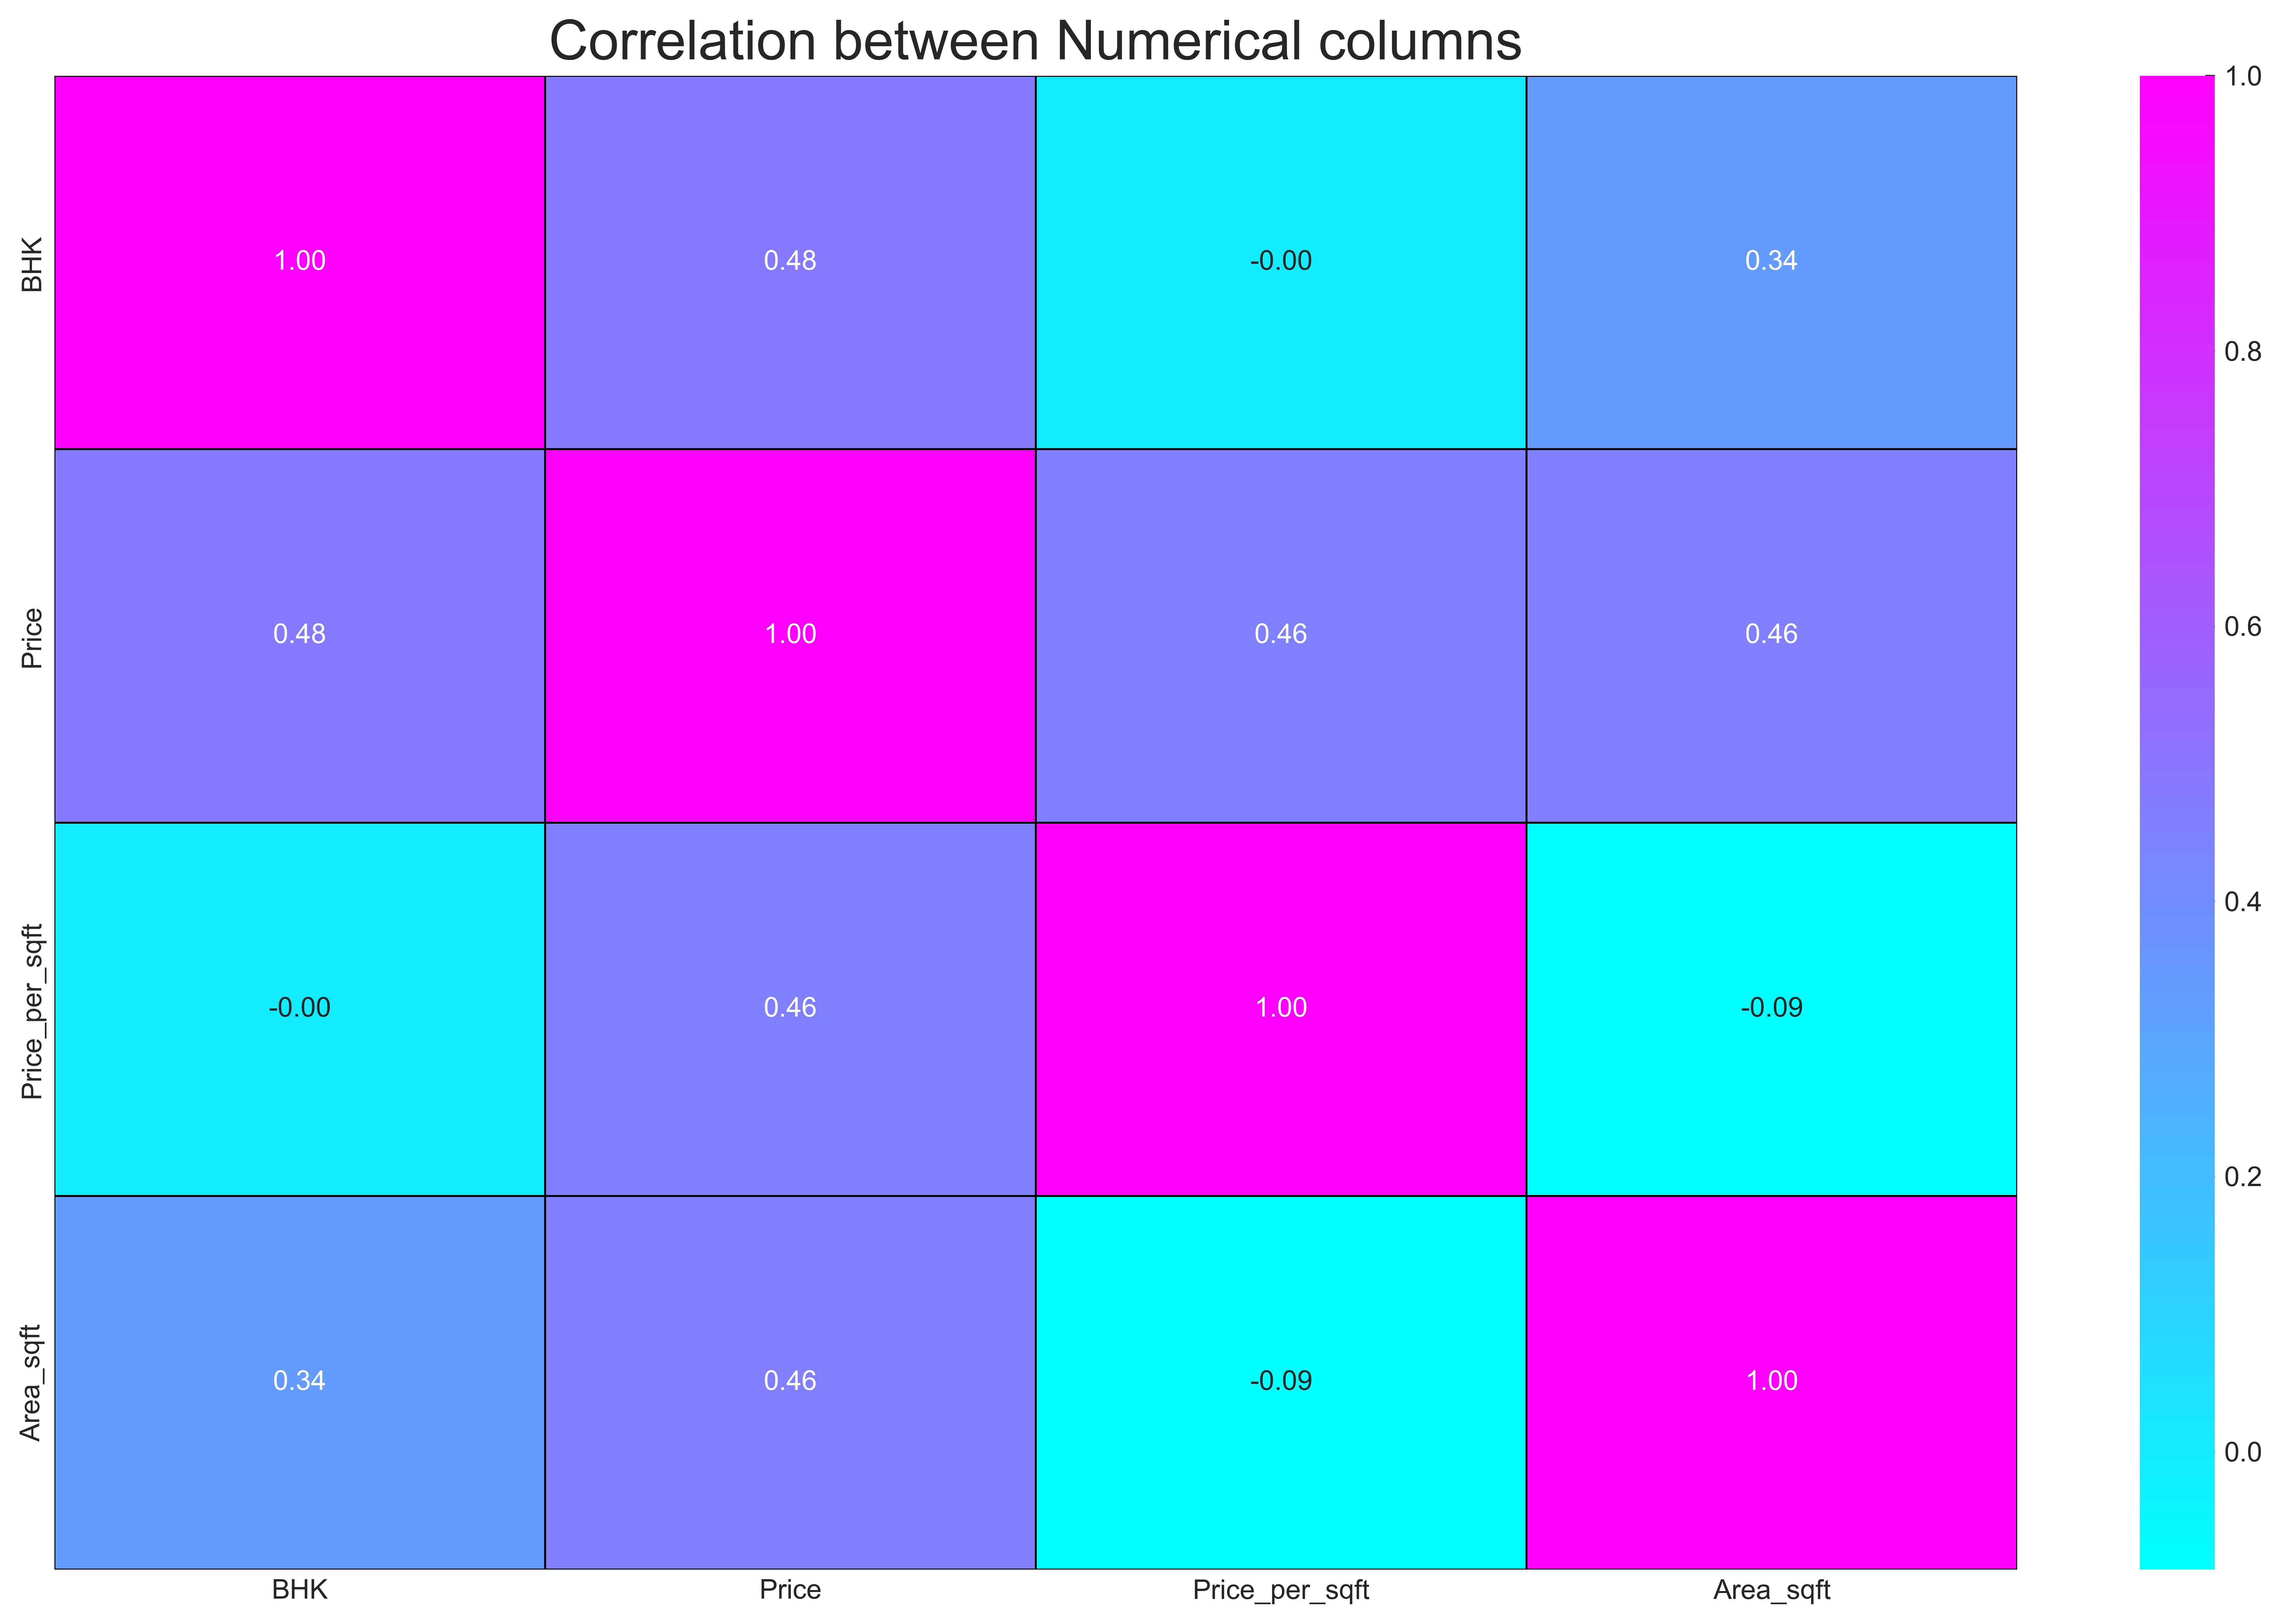

In [71]:
plt.figure(figsize=(16,10), dpi=300)
plt.title('Correlation between Numerical columns', fontsize=20)
sns.heatmap(data_cor, annot=True, fmt = '.2f', linewidths=0.5, cmap='cool', linecolor='black');


<Figure size 4800x2400 with 0 Axes>

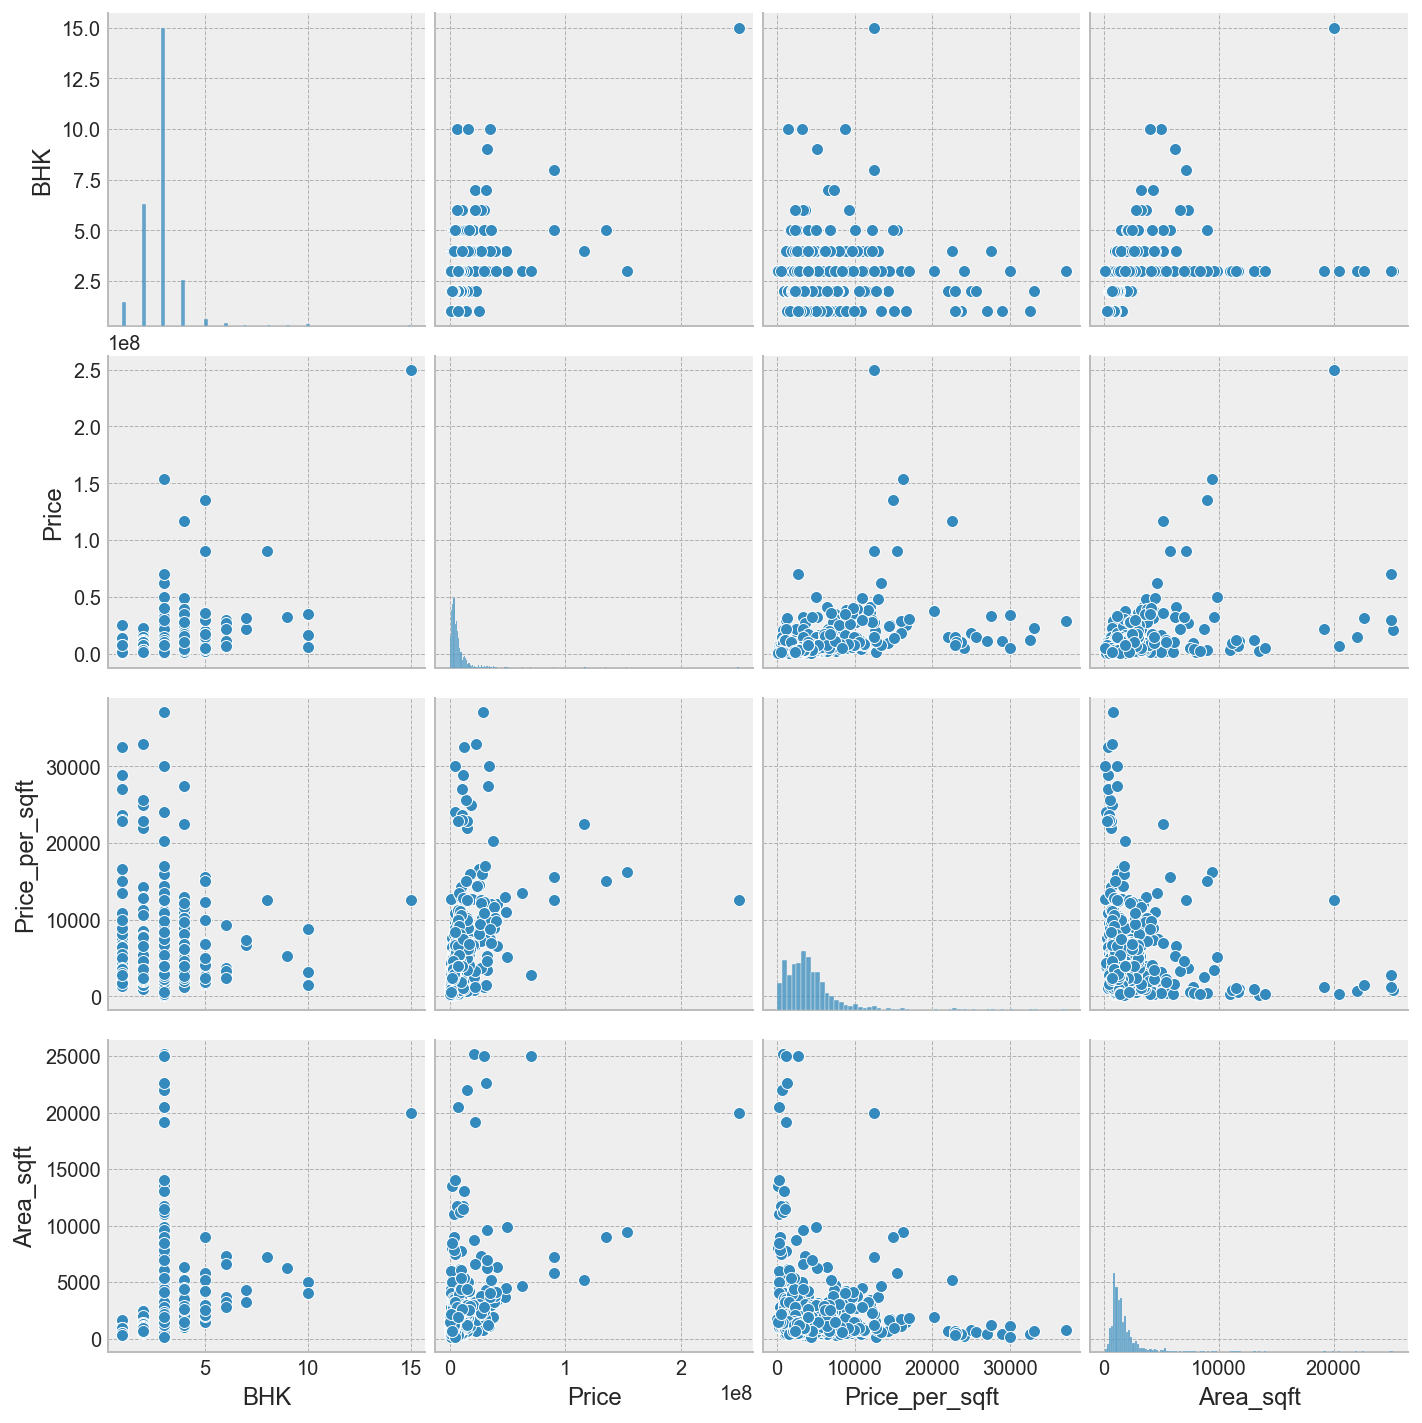

CPU times: total: 1.73 s
Wall time: 4.24 s


In [72]:
%%time
# the above command is a magic command to display wall time in seconds
plt.figure(figsize=(16,8), dpi= 300)
sns.pairplot(dff3)
plt.show();